In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.sparse



mnist = fetch_mldata('MNIST original')
# These are the images
# There are 70,000 images (28 by 28 images for a dimensionality of 784)
print(mnist.data.shape)
# These are the labels
print(mnist.target.shape)
train_image, test_image, train_label, test_label =train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)
print(train_image.shape)
print(test_image.shape)
print(train_label.shape)
print(test_label.shape)#Showing the MNIST images and labels


(70000, 784)
(70000,)
(60000, 784)
(10000, 784)
(60000,)
(10000,)


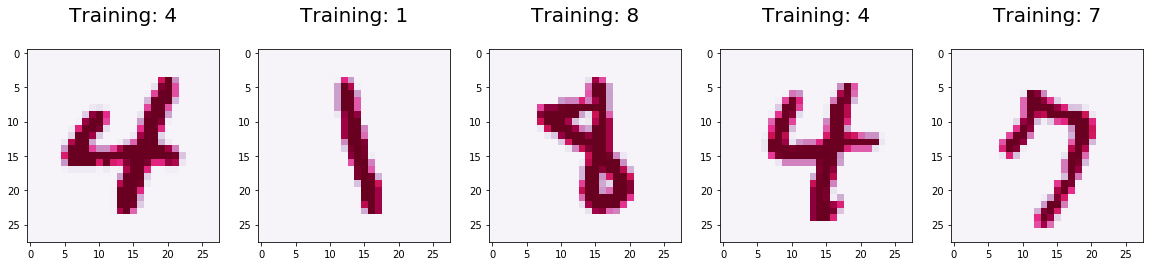

In [2]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_image[0:5], train_label[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.PuRd)
    plt.title('Training: %i\n' % label, fontsize = 20)
plt.show()

In [3]:
#One hot vector:-  
#is a unidimensional array of labels into a one-hot varient, where the array is size m (examples) x n (classes)
#meaning one value corresponding to the correct label is set to 1 and the others are set to 0
def oneHot(label_data):
    m = label_data.shape[0]
    #label_data = label_data[:,0]
    oh_vec = scipy.sparse.csr_matrix((np.ones(m), (label_data, np.array(range(m)))))
    oh_vec = np.array(oh_vec.todense()).T
    return oh_vec
print("one hot vector:")
oneHot(train_label)

one hot vector:


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [4]:
#Softmax function as we need to classify input data to multiple classes
def softmax_reg(predicted_val):
    predicted_val -= np.max(predicted_val)
    probability = (np.exp(predicted_val).T/np.sum(np.exp(predicted_val),axis=1)).T
    print (probability)
    return probability


In [9]:
#Loss function where w is weight
def loss_regression(w,inp_data,out_data,lambda_val):
    num_train = inp_data.shape[0]
    hot_mat = oneHot(out_data)
    predicted_val = np.dot(inp_data,w)
    prob = softmax_reg(predicted_val)
    
    loss = (-1 ) * np.sum(hot_mat * np.log(prob))/ num_train + (lambda_val/2)*np.sum(w*w) 
    gradient = ((-1) * np.dot(inp_data.T,(hot_mat - prob)))/ num_train + lambda_val*w
    return loss,gradient

In [13]:
#We initialize our weights, regularization factor, number of iterations, and learning rate.
#Then loop over a computation of the loss and gradient, and application of gradient.
w = np.zeros([train_image.shape[1],len(np.unique(train_label))])
num_iter = 1000
lambda_val = 1
learning_rate = 1e-5
loss_vec = []
for i in range(0,num_iter):
    loss,gradient = loss_regression(w,train_image,train_label,lambda_val)
    #print('loss is:', loss,'gradient size is:', gradient.shape)
    loss_vec.append(loss)
    w = w - (learning_rate * gradient)
print (loss)


[[ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 ..., 
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]
 [ 0.1  0.1  0.1 ...,  0.1  0.1  0.1]]
[[ 0.10567984  0.03490392  0.08713352 ...,  0.10516264  0.11148246
   0.15482513]
 [ 0.07785556  0.11016004  0.09508927 ...,  0.0834604   0.13810142
   0.10008784]
 [ 0.09146899  0.05363733  0.08850501 ...,  0.10464151  0.14334878
   0.12184683]
 ..., 
 [ 0.11732276  0.02980034  0.05248771 ...,  0.15937935  0.1017888
   0.17537462]
 [ 0.08771887  0.11885123  0.09784286 ...,  0.13509333  0.12980238
   0.10890025]
 [ 0.09601497  0.04224214  0.10158053 ...,  0.07655416  0.22275562
   0.08512882]]
[[ 0.01765328  0.03280185  0.04337748 ...,  0.12255679  0.03726989
   0.18018867]
 [ 0.02914301  0.20016167  0.07325784 ...,  0.08469338  0.10327758
   0.09955493]
 [ 0.01663537  0.0941478   0.05582478 ...,  0.16336616  0.06953126
   0.15179401]
 ..., 
 [ 0.02153  

[[  5.51200803e-04   3.54801749e-04   9.21939996e-04 ...,   7.50873193e-03
    9.59896005e-04   4.35445164e-02]
 [  5.62496241e-03   4.43796781e-01   3.54583539e-02 ...,   2.71401864e-02
    1.03804829e-01   5.15559362e-02]
 [  2.76905937e-03   2.19332559e-02   2.12185490e-02 ...,   1.66109320e-01
    5.12075602e-02   2.04702326e-01]
 ..., 
 [  5.88399884e-03   4.69079691e-04   2.92514912e-04 ...,   3.62831013e-01
    2.09058075e-03   4.21022140e-01]
 [  1.20492038e-02   2.32227062e-01   2.85898111e-02 ...,   5.01980176e-01
    3.52946139e-02   1.03276314e-01]
 [  2.23282259e-03   6.76205521e-03   2.08491726e-02 ...,   3.23799967e-02
    6.30794751e-01   1.47258616e-02]]
[[  5.66717641e-04   3.17182093e-04   7.21353957e-04 ...,   7.24353160e-03
    2.12065803e-03   4.47962388e-02]
 [  5.35156062e-03   4.34186391e-01   3.07503909e-02 ...,   2.51292064e-02
    1.64822450e-01   4.90344013e-02]
 [  2.96602644e-03   2.10362828e-02   1.81760891e-02 ...,   1.72293859e-01
    1.39079577e-01   

[[  1.37650775e-04   8.04656075e-05   1.82111528e-04 ...,   2.91710964e-03
    5.28909432e-04   2.09155497e-02]
 [  2.39481845e-03   5.65477619e-01   2.30982292e-02 ...,   1.46312915e-02
    1.15214660e-01   3.27962118e-02]
 [  1.25230852e-03   1.33856461e-02   1.44135838e-02 ...,   1.56322058e-01
    1.13672150e-01   2.19964796e-01]
 ..., 
 [  3.50557956e-03   1.20362348e-04   5.98734866e-05 ...,   3.90957301e-01
    1.84229688e-03   4.51244103e-01]
 [  7.03407874e-03   1.68903616e-01   1.73107227e-02 ...,   6.38513097e-01
    2.87168271e-02   8.93748848e-02]
 [  4.58088364e-04   1.57565689e-03   5.62867194e-03 ...,   1.10236280e-02
    8.67655860e-01   3.53594857e-03]]
[[  1.26706713e-04   7.42582217e-05   1.67427371e-04 ...,   2.77187155e-03
    4.93636604e-04   2.02719169e-02]
 [  2.25860922e-03   5.74353314e-01   2.25408587e-02 ...,   1.40218352e-02
    1.12547621e-01   3.20006064e-02]
 [  1.18102991e-03   1.30065440e-02   1.41394265e-02 ...,   1.54286402e-01
    1.13253192e-01   

[[  5.30528539e-05   3.15945140e-05   6.73423210e-05 ...,   1.65942711e-03
    2.73928007e-04   1.26165415e-02]
 [  1.19779892e-03   6.60854920e-01   1.68490099e-02 ...,   8.86594193e-03
    9.25778371e-02   2.32482506e-02]
 [  6.60119739e-04   1.00717288e-02   1.15638059e-02 ...,   1.38872969e-01
    1.29037904e-01   2.26216209e-01]
 ..., 
 [  2.27463979e-03   4.99960973e-05   2.18287479e-05 ...,   4.10093614e-01
    1.20981480e-03   4.59537518e-01]
 [  4.56016113e-03   1.29136563e-01   1.25706407e-02 ...,   7.20446076e-01
    2.00349333e-02   7.76290489e-02]
 [  2.12230920e-04   8.87992786e-04   3.59040965e-03 ...,   7.53389649e-03
    8.94841124e-01   1.98444906e-03]]
[[  4.99151830e-05   2.97693889e-05   6.32070812e-05 ...,   1.60340585e-03
    2.63263326e-04   1.22110888e-02]
 [  1.14125037e-03   6.66887316e-01   1.64680846e-02 ...,   8.55756040e-03
    9.10844217e-02   2.26992136e-02]
 [  6.32304751e-04   9.90400888e-03   1.13943576e-02 ...,   1.37599849e-01
    1.30218434e-01   

[[  2.63977246e-05   1.59759296e-05   3.26622814e-05 ...,   1.13336397e-03
    1.75975869e-04   8.69721704e-03]
 [  6.66526922e-04   7.28075067e-01   1.26959186e-02 ...,   5.75642212e-03
    7.55115351e-02   1.74545014e-02]
 [  3.95531083e-04   8.39421054e-03   9.70003157e-03 ...,   1.23177322e-01
    1.43692726e-01   2.30540442e-01]
 ..., 
 [  1.60407650e-03   2.59614070e-05   1.01744441e-05 ...,   4.26614754e-01
    8.95608052e-04   4.61137495e-01]
 [  3.20569751e-03   1.02735996e-01   9.83401187e-03 ...,   7.73031192e-01
    1.52610402e-02   6.82902454e-02]
 [  1.19048725e-04   5.89738136e-04   2.58140998e-03 ...,   5.67537495e-03
    9.09593261e-01   1.32053947e-03]]
[[  2.51977444e-05   1.52637367e-05   3.11286295e-05 ...,   1.10592703e-03
    1.71009327e-04   8.48556182e-03]
 [  6.39332557e-04   7.32363253e-01   1.24376605e-02 ...,   5.58136823e-03
    7.43958385e-02   1.71068629e-02]
 [  3.81650082e-04   8.29966576e-03   9.58162458e-03 ...,   1.22054180e-01
    1.44763251e-01   

[[  1.52922641e-05   9.32928699e-06   1.85881941e-05 ...,   8.55870694e-04
    1.26428034e-04   6.52216504e-03]
 [  4.00269649e-04   7.76281757e-01   9.84035722e-03 ...,   3.94008007e-03
    6.28297561e-02   1.36765475e-02]
 [  2.56512541e-04   7.40008138e-03   8.35627861e-03 ...,   1.09546934e-01
    1.57015420e-01   2.33634180e-01]
 ..., 
 [  1.19218416e-03   1.53618900e-05   5.50177129e-06 ...,   4.40668272e-01
    7.07383140e-04   4.60164853e-01]
 [  2.38261084e-03   8.46092132e-02   8.08811310e-03 ...,   8.08855760e-01
    1.22839873e-02   6.10667599e-02]
 [  7.50895728e-05   4.30629999e-04   2.00007194e-03 ...,   4.53811089e-03
    9.18719286e-01   9.76737825e-04]]
[[  1.47312245e-05   8.98942128e-06   1.78850998e-05 ...,   8.40011016e-04
    1.23641916e-04   6.39556986e-03]
 [  3.85874946e-04   7.79396450e-01   9.65962339e-03 ...,   3.83398666e-03
    6.20011182e-02   1.34417423e-02]
 [  2.48731235e-04   7.34064041e-03   8.26798628e-03 ...,   1.08583564e-01
    1.57987699e-01   

[[  9.79150321e-06   5.97301108e-06   1.17350910e-05 ...,   6.87520779e-04
    9.70965545e-05   5.16660233e-03]
 [  2.54857039e-04   8.11674822e-01   7.81690458e-03 ...,   2.81361655e-03
    5.33629139e-02   1.10690452e-02]
 [  1.75794513e-04   6.75504061e-03   7.33541469e-03 ...,   9.79004459e-02
    1.69085233e-01   2.35574620e-01]
 ..., 
 [  9.20329757e-04   9.91785040e-06   3.29150285e-06 ...,   4.52985173e-01
    5.82851480e-04   4.57697261e-01]
 [  1.84484411e-03   7.16704721e-02   6.89262507e-03 ...,   8.34493045e-01
    1.02854671e-02   5.54021228e-02]
 [  5.11905775e-05   3.33754474e-04   1.62741141e-03 ...,   3.77250893e-03
    9.25009005e-01   7.73103156e-04]]
[[  9.49184626e-06   5.78844195e-06   1.13645859e-05 ...,   6.77318485e-04
    9.53357388e-05   5.08366899e-03]
 [  2.46665850e-04   8.13993935e-01   7.68679384e-03 ...,   2.74584980e-03
    5.27391781e-02   1.09026827e-02]
 [  1.71073684e-04   6.71502967e-03   7.26692912e-03 ...,   9.70794625e-02
    1.69963338e-01   

[[  6.72901266e-06   4.07658631e-06   7.96478565e-06 ...,   5.75497081e-04
    7.78600436e-05   4.25195196e-03]
 [  1.70023796e-04   8.38311846e-01   6.34352487e-03 ...,   2.08019665e-03
    4.61794800e-02   9.18980723e-03]
 [  1.25548747e-04   6.31188076e-03   6.53336912e-03 ...,   8.79750804e-02
    1.79960789e-01   2.36557604e-01]
 ..., 
 [  7.31486195e-04   6.81794037e-06   2.11971486e-06 ...,   4.63944643e-01
    4.94661773e-04   4.54393662e-01]
 [  1.47414833e-03   6.21163502e-02   6.03066020e-03 ...,   8.53555783e-01
    8.86931795e-03   5.08893711e-02]
 [  3.68840659e-05   2.69437578e-04   1.37077751e-03 ...,   3.22275767e-03
    9.29670253e-01   6.41148688e-04]]
[[  6.55308213e-06   3.96692671e-06   7.74937225e-06 ...,   5.68427460e-04
    7.66530800e-05   4.19397373e-03]
 [  1.65087640e-04   8.40080917e-01   6.24742122e-03 ...,   2.03499182e-03
    4.57010997e-02   9.06740553e-03]
 [  1.22514636e-04   6.28374290e-03   6.47877301e-03 ...,   8.72748504e-02
    1.80750034e-01   

[[  4.87395791e-06   2.91629309e-06   5.70089247e-06 ...,   4.95914363e-04
    6.43206076e-05   3.59821443e-03]
 [  1.17845442e-04   8.58834961e-01   5.24397629e-03 ...,   1.58300323e-03
    4.06225110e-02   7.78776521e-03]
 [  9.26108735e-05   5.99616620e-03   5.88781826e-03 ...,   7.94967746e-02
    1.89720764e-01   2.36785341e-01]
 ..., 
 [  5.95111078e-04   4.91536733e-06   1.44397522e-06 ...,   4.73772910e-01
    4.29051093e-04   4.50670214e-01]
 [  1.20781476e-03   5.48576492e-02   5.38409242e-03 ...,   8.68166324e-01
    7.82315001e-03   4.72404533e-02]
 [  2.77008472e-05   2.24059296e-04   1.18471131e-03 ...,   2.80911671e-03
    9.33305859e-01   5.49981385e-04]]
[[  4.76310844e-06   2.84668905e-06   5.56617366e-06 ...,   4.90741175e-04
    6.34441770e-05   3.55566652e-03]
 [  1.14728291e-04   8.60214831e-01   5.17133501e-03 ...,   1.55173126e-03
    4.02484096e-02   7.69489772e-03]
 [  9.05725689e-05   5.97583241e-03   5.84338448e-03 ...,   7.88973312e-02
    1.90427956e-01   

[[  3.67633528e-06   2.16299419e-06   4.24925336e-06 ...,   4.36561634e-04
    5.42956415e-05   3.11016827e-03]
 [  8.43258180e-05   8.74987653e-01   4.40516809e-03 ...,   1.23429341e-03
    3.62407745e-02   6.71162086e-03]
 [  7.01313868e-05   5.76635163e-03   5.35839455e-03 ...,   7.22234253e-02
    1.98459113e-01   2.36433071e-01]
 ..., 
 [  4.93545192e-04   3.67884219e-06   1.02817558e-06 ...,   4.82622284e-01
    3.78387376e-04   4.46792808e-01]
 [  1.01002790e-03   4.92100039e-02   4.88361006e-03 ...,   8.79641996e-01
    7.02426594e-03   4.42504298e-02]
 [  2.14859013e-05   1.90572027e-04   1.04448288e-03 ...,   2.48666959e-03
    9.36248379e-01   4.83908118e-04]]
[[  3.60256425e-06   2.11651925e-06   4.16013472e-06 ...,   4.32615705e-04
    5.36317542e-05   3.07775146e-03]
 [  8.22790450e-05   8.76085623e-01   4.34912147e-03 ...,   1.21198181e-03
    3.59427696e-02   6.63934053e-03]
 [  6.87128704e-05   5.75144242e-03   5.32162735e-03 ...,   7.17077753e-02
    1.99091840e-01   

[[  2.86362547e-06   1.65090832e-06   3.26968987e-06 ...,   3.90606902e-04
    4.65894105e-05   2.73323216e-03]
 [  6.19932494e-05   8.87943799e-01   3.75264288e-03 ...,   9.82542298e-04
    3.27235770e-02   5.86581023e-03]
 [  5.42829713e-05   5.59744630e-03   4.91752974e-03 ...,   6.59520982e-02
    2.06275946e-01   2.35642917e-01]
 ..., 
 [  4.15972060e-04   2.83793047e-06   7.58755451e-07 ...,   4.90605796e-01
    3.38116734e-04   4.42931442e-01]
 [  8.59110398e-04   4.47270131e-02   4.48612988e-03 ...,   8.88838573e-01
    6.39753099e-03   4.17712544e-02]
 [  1.71014863e-05   1.64992918e-04   9.35564143e-04 ...,   2.22824284e-03
    9.38695991e-01   4.34221079e-04]]
[[  2.81234267e-06   1.61860777e-06   3.20805560e-06 ...,   3.87497369e-04
    4.60702680e-05   2.70778901e-03]
 [  6.06041564e-05   8.88833028e-01   3.70860405e-03 ...,   9.66197104e-04
    3.24821390e-02   5.80833192e-03]
 [  5.32667605e-05   5.58647764e-03   4.88668417e-03 ...,   6.55061905e-02
    2.06841944e-01   

[[  2.28958028e-06   1.28976937e-06   2.58118334e-06 ...,   3.53953850e-04
    4.04945761e-05   2.43409748e-03]
 [  4.66453233e-05   8.98511452e-01   3.23615425e-03 ...,   7.96213475e-04
    2.98542121e-02   5.18757820e-03]
 [  4.28047606e-05   5.47350575e-03   4.54566362e-03 ...,   6.05159210e-02
    2.13270529e-01   2.34526713e-01]
 ..., 
 [  3.55458892e-04   2.24458263e-06   5.76664480e-07 ...,   4.97813555e-01
    3.05361170e-04   4.39193692e-01]
 [  7.41315140e-04   4.11076091e-02   4.16360864e-03 ...,   8.96333524e-01
    5.89471895e-03   3.96941059e-02]
 [  1.39031757e-05   1.44913827e-04   8.48896024e-04 ...,   2.01645822e-03
    9.40774427e-01   3.95746755e-04]]
[[  2.25264073e-06   1.26657789e-06   2.53699344e-06 ...,   3.51438355e-04
    4.00785363e-05   2.41364112e-03]
 [  4.56754689e-05   8.99242937e-01   3.20098584e-03 ...,   7.83962347e-04
    2.96555942e-02   5.14102728e-03]
 [  4.20588203e-05   5.46550322e-03   4.51947961e-03 ...,   6.01282569e-02
    2.13777260e-01   

[[  1.87056168e-06   1.02731365e-06   2.08089386e-06 ...,   3.24008153e-04
    3.55662543e-05   2.19138879e-03]
 [  3.58118441e-05   9.07259190e-01   2.82099884e-03 ...,   6.55299486e-04
    2.74789924e-02   4.63433005e-03]
 [  3.43001707e-05   5.38386317e-03   4.22850835e-03 ...,   5.57785400e-02
    2.19536921e-01   2.33171185e-01]
 ..., 
 [  3.07395256e-04   1.81289441e-06   4.49203871e-07 ...,   5.04320992e-01
    2.78215335e-04   4.35645922e-01]
 [  6.47582603e-04   3.81427090e-02   3.89709052e-03 ...,   9.02529190e-01
    5.48364684e-03   3.79376255e-02]
 [  1.15048732e-05   1.28799016e-04   7.78554365e-04 ...,   1.83969572e-03
    9.42567734e-01   3.65239449e-04]]
[[  1.84315686e-06   1.01020766e-06   2.04825492e-06 ...,   3.21929019e-04
    3.52263221e-05   2.17461203e-03]
 [  3.51178334e-05   9.07869251e-01   2.79250675e-03 ...,   6.45932179e-04
    2.73133480e-02   4.59603188e-03]
 [  3.37410997e-05   5.37815945e-03   4.20605266e-03 ...,   5.54397324e-02
    2.19991325e-01   

[[  1.55618946e-06   8.31736950e-07   1.70719869e-06 ...,   2.99052130e-04
    3.15103231e-05   1.99081040e-03]
 [  2.79848697e-05   9.14595524e-01   2.48268847e-03 ...,   5.46703112e-04
    2.54869933e-02   4.17631866e-03]
 [  2.78741254e-05   5.32109964e-03   3.95538296e-03 ...,   5.16286040e-02
    2.25161625e-01   2.31643129e-01]
 ..., 
 [  2.68619556e-04   1.49058666e-06   3.57302096e-07 ...,   5.10193280e-01
    2.55368496e-04   4.32327027e-01]
 [  5.71746897e-04   3.56833450e-02   3.67335228e-03 ...,   9.07713628e-01
    5.14212276e-03   3.64400191e-02]
 [  9.66438976e-06   1.15626040e-04   7.20511763e-04 ...,   1.68989663e-03
    9.44134629e-01   3.40570549e-04]]
[[  1.53534605e-06   8.18830007e-07   1.68248321e-06 ...,   2.97302633e-04
    3.12282055e-05   1.97682076e-03]
 [  2.74774283e-05   9.15110549e-01   2.45930667e-03 ...,   5.39414348e-04
    2.53471453e-02   4.14437779e-03]
 [  2.74474684e-05   5.31722160e-03   3.93595006e-03 ...,   5.13309802e-02
    2.25570009e-01   

[[  1.31477713e-06   6.82872278e-07   1.42150265e-06 ...,   2.77905969e-04
    2.81241819e-05   1.82246584e-03]
 [  2.22131761e-05   9.20819702e-01   2.20359983e-03 ...,   4.61611280e-04
    2.37967640e-02   3.79224634e-03]
 [  2.29349063e-05   5.27988594e-03   3.71814907e-03 ...,   4.79749786e-02
    2.30222622e-01   2.29993836e-01]
 ..., 
 [  2.36906506e-04   1.24454928e-06   2.89339489e-07 ...,   5.15487858e-01
    2.35889478e-04   4.29257490e-01]
 [  5.09494723e-04   3.36209717e-02   3.48292017e-03 ...,   9.12097953e-01
    4.85441035e-03   3.51536715e-02]
 [  8.22388756e-06   1.04689669e-04   6.71940658e-04 ...,   1.56129903e-03
    9.45517688e-01   3.20291734e-04]]
[[  1.29858360e-06   6.72943039e-07   1.40238712e-06 ...,   2.76411446e-04
    2.78870188e-05   1.81063470e-03]
 [  2.18350164e-05   9.21259221e-01   2.18418948e-03 ...,   4.55851352e-04
    2.36773927e-02   3.76528824e-03]
 [  2.26040906e-05   5.27748823e-03   3.70119626e-03 ...,   4.77122473e-02
    2.30590625e-01   

[[  1.12565450e-06   5.67481204e-07   1.19871392e-06 ...,   2.59733900e-04
    2.52634343e-05   1.67930090e-03]
 [  1.78792305e-05   9.26154872e-01   1.97082007e-03 ...,   3.93947469e-04
    2.23475096e-02   3.46652788e-03]
 [  1.90808227e-05   5.25628870e-03   3.51050450e-03 ...,   4.47428039e-02
    2.34789251e-01   2.28262653e-01]
 ..., 
 [  2.10654278e-04   1.05308945e-06   2.37967919e-07 ...,   5.20255971e-01
    2.19098427e-04   4.26445455e-01]
 [  4.57736387e-04   3.18749179e-02   3.31884982e-03 ...,   9.15840052e-01
    4.60907820e-03   3.40414108e-02]
 [  7.07712292e-06   9.54888611e-05   6.30801300e-04 ...,   1.44967531e-03
    9.46748777e-01   3.03386563e-04]]
[[  1.11284042e-06   5.59713671e-07   1.18365871e-06 ...,   2.58440632e-04
    2.50619039e-05   1.66917348e-03]
 [  1.75925982e-05   9.26533586e-01   1.95453878e-03 ...,   3.89332511e-04
    2.22446094e-02   3.44353531e-03]
 [  1.88206806e-05   5.25511293e-03   3.49560809e-03 ...,   4.45097850e-02
    2.35121857e-01   

[[  9.74909332e-07   4.76612733e-07   1.02199070e-06 ...,   2.43928092e-04
    2.28221943e-05   1.55615957e-03]
 [  1.45718252e-05   9.30770169e-01   1.77473144e-03 ...,   3.39430204e-04
    2.10931542e-02   3.18753571e-03]
 [  1.60328328e-05   5.24733707e-03   3.32750011e-03 ...,   4.18703186e-02
    2.38922589e-01   2.26479755e-01]
 ..., 
 [  1.88686999e-04   9.01573324e-07   1.98388569e-07 ...,   5.24543694e-01
    2.04487197e-04   4.23890836e-01]
 [  4.14212433e-04   3.03841697e-02   3.17594913e-03 ...,   9.19060124e-01
    4.39764554e-03   3.30738727e-02]
 [  6.15057334e-06   8.76586058e-05   5.95587823e-04 ...,   1.35185407e-03
    9.47852387e-01   2.89122623e-04]]
[[  9.64605803e-07   4.70446768e-07   1.00994536e-06 ...,   2.42796489e-04
    2.26493636e-05   1.54739924e-03]
 [  1.43512432e-05   9.31099317e-01   1.76094636e-03 ...,   3.35686665e-04
    2.10036646e-02   3.16774211e-03]
 [  1.58256719e-05   5.24718581e-03   3.31432498e-03 ...,   4.16627274e-02
    2.39224172e-01   

[[  8.52920730e-07   4.04058140e-07   8.79712446e-07 ...,   2.30036359e-04
    2.07209338e-05   1.44919056e-03]
 [  1.20108856e-05   9.34795708e-01   1.60806272e-03 ...,   2.94983746e-04
    1.99982789e-02   2.94644432e-03]
 [  1.35931337e-05   5.25074235e-03   3.16520096e-03 ...,   3.93063269e-02
    2.42676091e-01   2.24668268e-01]
 ..., 
 [  1.70126425e-04   7.79874359e-07   1.67378226e-07 ...,   5.28392652e-01
    1.91668193e-04   4.21588136e-01]
 [  3.77240139e-04   2.91018545e-02   3.05026848e-03 ...,   9.21851108e-01
    4.21370317e-03   3.22276098e-02]
 [  5.39212433e-06   8.09272080e-05   5.65166110e-04 ...,   1.26541003e-03
    9.48847768e-01   2.76960035e-04]]
[[  8.44518425e-07   3.99100075e-07   8.69941826e-07 ...,   2.29036626e-04
    2.05715331e-05   1.44154305e-03]
 [  1.18387941e-05   9.35084003e-01   1.59629161e-03 ...,   2.91913112e-04
    1.99198295e-02   2.92926265e-03]
 [  1.34262803e-05   5.25146199e-03   3.15347900e-03 ...,   3.91206022e-02
    2.42950468e-01   

[[  7.52875885e-07   3.45413663e-07   7.63665705e-07 ...,   2.17715595e-04
    1.88986991e-05   1.35546194e-03]
 [  1.00017524e-05   9.38332955e-01   1.46524112e-03 ...,   2.58359708e-04
    1.90352981e-02   2.73645111e-03]
 [  1.16189703e-05   5.26471080e-03   3.02044373e-03 ...,   3.70081850e-02
    2.46096343e-01   2.22845893e-01]
 ..., 
 [  1.54306434e-04   6.80826253e-07   1.42717741e-07 ...,   5.31840564e-01
    1.80340492e-04   4.19528381e-01]
 [  3.45545829e-04   2.79914569e-02   2.93875738e-03 ...,   9.24285875e-01
    4.05232740e-03   3.14837162e-02]
 [  4.76405182e-06   7.50886206e-05   5.38667054e-04 ...,   1.18845699e-03
    9.49750333e-01   2.66492913e-04]]
[[  7.45938010e-07   3.41381037e-07   7.55643697e-07 ...,   2.16824895e-04
    1.87686486e-05   1.34873179e-03]
 [  9.86581636e-06   9.38587241e-01   1.45511176e-03 ...,   2.55815531e-04
    1.89660299e-02   2.72142529e-03]
 [  1.14831916e-05   5.26617988e-03   3.00995813e-03 ...,   3.68413524e-02
    2.46346835e-01   

[[  6.69848546e-07   2.97493749e-07   6.67920707e-07 ...,   2.06700906e-04
    1.73079585e-05   1.27270406e-03]
 [  8.40664266e-06   9.41462019e-01   1.34194201e-03 ...,   2.27888424e-04
    1.81824661e-02   2.55223973e-03]
 [  1.00056468e-05   5.28781531e-03   2.89065985e-03 ...,   3.49401992e-02
    2.49223834e-01   2.21026140e-01]
 ..., 
 [  1.40714763e-04   5.99255728e-07   1.22845345e-07 ...,   5.34921682e-01
    1.70266804e-04   4.17700464e-01]
 [  3.18151337e-04   2.70241700e-02   2.83902776e-03 ...,   9.26422270e-01
    3.90968012e-03   3.08268107e-02]
 [  4.23853736e-06   6.99840059e-05   5.15414388e-04 ...,   1.11950607e-03
    9.50572627e-01   2.57410785e-04]]
[[  6.64055819e-07   2.94180149e-07   6.61263291e-07 ...,   2.05901452e-04
    1.71940491e-05   1.26673867e-03]
 [  8.29804667e-06   9.41687733e-01   1.33316361e-03 ...,   2.25761053e-04
    1.81209043e-02   2.53901074e-03]
 [  9.89411453e-06   5.28993646e-03   2.88123369e-03 ...,   3.47897626e-02
    2.49453324e-01   

[[  6.00209799e-07   2.57953468e-07   5.88115101e-07 ...,   1.96784610e-04
    1.59110934e-05   1.19913366e-03]
 [  7.12640678e-06   9.44246870e-01   1.23477070e-03 ...,   2.02312165e-04
    1.74224485e-02   2.38960317e-03]
 [  8.67525977e-06   5.31890515e-03   2.77374467e-03 ...,   3.30723503e-02
    2.52093701e-01   2.19219274e-01]
 ..., 
 [  1.28952527e-04   5.31361281e-07   1.06640146e-07 ...,   5.37667152e-01
    1.61257427e-04   4.16092079e-01]
 [  2.94295547e-04   2.61770076e-02   2.74918751e-03 ...,   9.28306725e-01
    3.78272997e-03   3.02442779e-02]
 [  3.79472571e-06   6.54891363e-05   4.94874724e-04 ...,   1.05736635e-03
    9.51324990e-01   2.49472519e-04]]
[[  5.95324742e-07   2.55205565e-07   5.82536994e-07 ...,   1.96062344e-04
    1.58107662e-05   1.19381222e-03]
 [  7.03875167e-06   9.44448381e-01   1.22711365e-03 ...,   2.00518376e-04
    1.73674108e-02   2.37788506e-03]
 [  8.58285425e-06   5.32159932e-03   2.76523226e-03 ...,   3.29362047e-02
    2.52304691e-01   

[[  5.41241600e-07   2.25039520e-07   5.20985272e-07 ...,   1.87801626e-04
    1.46779459e-05   1.13333100e-03]
 [  6.08861505e-06   9.46739124e-01   1.14103429e-03 ...,   1.80671091e-04
    1.67412845e-02   2.24517436e-03]
 [  7.56907445e-06   5.35704139e-03   2.66795912e-03 ...,   3.13792731e-02
    2.54736414e-01   2.17433032e-01]
 ..., 
 [  1.18705587e-04   4.74304424e-07   9.32833654e-08 ...,   5.40105327e-01
    1.53158845e-04   4.14690358e-01]
 [  2.73379158e-04   2.54314374e-02   2.66772116e-03 ...,   9.29976889e-01
    3.66905431e-03   2.97256924e-02]
 [  3.41674896e-06   6.15055939e-05   4.76622258e-04 ...,   1.00107390e-03
    9.52016048e-01   2.42488282e-04]]
[[  5.37084796e-07   2.22741736e-07   5.16271171e-07 ...,   1.87145295e-04
    1.45891364e-05   1.12855665e-03]
 [  6.01718888e-06   9.46919976e-01   1.13431542e-03 ...,   1.79146939e-04
    1.66918132e-02   2.23473692e-03]
 [  7.49190908e-06   5.36024366e-03   2.66023957e-03 ...,   3.12556356e-02
    2.54931073e-01   

[[  4.90877454e-07   1.97422419e-07   4.64052501e-07 ...,   1.79619100e-04
    1.35840670e-05   1.07415221e-03]
 [  5.23962453e-06   9.48980829e-01   1.05857578e-03 ...,   1.62223932e-04
    1.61276223e-02   2.11623062e-03]
 [  6.64227418e-06   5.40144954e-03   2.57185517e-03 ...,   2.98394381e-02
    2.57178400e-01   2.15673179e-01]
 ..., 
 [  1.09723971e-04   4.25934862e-07   8.21673145e-08 ...,   5.42262036e-01
    1.45845466e-04   4.13482318e-01]
 [  2.54925146e-04   2.47723763e-02   2.59340292e-03 ...,   9.31463568e-01
    3.56669612e-03   2.92623793e-02]
 [  3.09237178e-06   5.79545025e-05   4.60313359e-04 ...,   9.49840177e-04
    9.52653064e-01   2.36306808e-04]]
[[  4.87311426e-07   1.95486467e-07   4.60037597e-07 ...,   1.79019591e-04
    1.35050919e-05   1.06984645e-03]
 [  5.18091206e-06   9.49143923e-01   1.05264763e-03 ...,   1.60919721e-04
    1.60829348e-02   2.10688670e-03]
 [  6.57736451e-06   5.40510609e-03   2.56482739e-03 ...,   2.97267915e-02
    2.57358610e-01   

[[  4.47524823e-07   1.74081151e-07   4.15408400e-07 ...,   1.72128909e-04
    1.26094393e-05   1.02066577e-03]
 [  4.53920159e-06   9.51006541e-01   9.85651893e-04 ...,   1.46391922e-04
    1.55721498e-02   2.00054952e-03]
 [  5.86028401e-06   5.45148451e-03   2.48421842e-03 ...,   2.84344909e-02
    2.59442589e-01   2.13943940e-01]
 ..., 
 [  1.01806870e-04   3.84602092e-07   7.28344045e-08 ...,   5.44160823e-01
    1.39213531e-04   4.12455161e-01]
 [  2.38550033e-04   2.41874418e-02   2.52523240e-03 ...,   9.32792182e-01
    3.47405898e-03   2.88470739e-02]
 [  2.81204508e-06   5.47719847e-05   4.45667974e-04 ...,   9.03013807e-04
    9.53242206e-01   2.30806249e-04]]
[[  4.44442873e-07   1.72438778e-07   4.11964899e-07 ...,   1.71578759e-04
    1.25389134e-05   1.01676430e-03]
 [  4.49054863e-06   9.51154273e-01   9.80394718e-04 ...,   1.45268627e-04
    1.55316013e-02   1.99214561e-03]
 [  5.80531424e-06   5.45555028e-03   2.47779734e-03 ...,   2.83315389e-02
    2.59609982e-01   

[[  4.09941223e-07   1.54222496e-07   3.73565441e-07 ...,   1.65242148e-04
    1.17375300e-05   9.72105658e-04]
 [  3.95681711e-06   9.52844891e-01   9.20841940e-04 ...,   1.32718604e-04
    1.50671649e-02   1.89630126e-03]
 [  5.19615877e-06   5.50660411e-03   2.40402367e-03 ...,   2.71487184e-02
    2.61548894e-01   2.12248330e-01]
 ..., 
 [  9.47915528e-05   3.49023946e-07   6.49355034e-08 ...,   5.45823158e-01
    1.33176560e-04   4.11596472e-01]
 [  2.23942717e-04   2.36663874e-02   2.46238647e-03 ...,   9.33983864e-01
    3.38982891e-03   2.84736563e-02]
 [  2.56823367e-06   5.19058181e-05   4.32455822e-04 ...,   8.60051986e-04
    9.53788750e-01   2.25887482e-04]]
[[  4.07259568e-07   1.52820357e-07   3.70593089e-07 ...,   1.64735189e-04
    1.16743041e-05   9.68555345e-04]
 [  3.91619720e-06   9.52979255e-01   9.16157734e-04 ...,   1.31745284e-04
    1.50302196e-02   1.88871039e-03]
 [  5.14931445e-06   5.51104103e-03   2.39813721e-03 ...,   2.70543487e-02
    2.61704890e-01   

[[  3.77146328e-07   1.37223677e-07   3.37351051e-07 ...,   1.58885025e-04
    1.09545768e-05   9.27836385e-04]
 [  3.46905539e-06   9.54519781e-01   8.62979207e-04 ...,   1.20840616e-04
    1.46062484e-02   1.80196732e-03]
 [  4.62870190e-06   5.56634881e-03   2.33040004e-03 ...,   2.59686140e-02
    2.63514630e-01   2.10588414e-01]
 ..., 
 [  8.85450768e-05   3.18193376e-07   5.82009996e-08 ...,   5.47268633e-01
    1.27661899e-04   4.10894351e-01]
 [  2.10848677e-04   2.32006718e-02   2.40418265e-03 ...,   9.35056312e-01
    3.31291549e-03   2.81369429e-02]
 [  2.35493131e-06   4.93129378e-05   4.20485996e-04 ...,   8.20498703e-04
    9.54297240e-01   2.21469151e-04]]
[[  3.74798474e-07   1.36019653e-07   3.34770355e-07 ...,   1.58416113e-04
    1.08976905e-05   9.24592943e-04]
 [  3.43490538e-06   9.54642446e-01   8.58787151e-04 ...,   1.19992519e-04
    1.45724581e-02   1.79508368e-03]
 [  4.58854861e-06   5.57112448e-03   2.32498678e-03 ...,   2.58818683e-02
    2.63660464e-01   

[[  3.48358652e-07   1.22590982e-07   3.05831390e-07 ...,   1.52995761e-04
    1.02490432e-05   8.87326426e-04]
 [  3.05777686e-06   9.56051301e-01   8.11098635e-04 ...,   1.10466200e-04
    1.41840122e-02   1.71627824e-03]
 [  4.14109359e-06   5.63032607e-03   2.26260349e-03 ...,   2.48825220e-02
    2.65354875e-01   2.08965511e-01]
 ..., 
 [  8.29580165e-05   2.91311376e-07   5.24203721e-08 ...,   5.48515134e-01
    1.22608062e-04   4.10337488e-01]
 [  1.99058055e-04   2.27831270e-02   2.35005111e-03 ...,   9.36024439e-01
    3.24240691e-03   2.78325200e-02]
 [  2.16730588e-06   4.69575487e-05   4.09599040e-04 ...,   7.83968003e-04
    9.54771608e-01   2.17483937e-04]]
[[  3.46291303e-07   1.21551517e-07   3.03578700e-07 ...,   1.52560569e-04
    1.01976885e-05   8.84352660e-04]
 [  3.02887939e-06   9.56163678e-01   8.07331628e-04 ...,   1.09723360e-04
    1.41529992e-02   1.71001304e-03]
 [  4.10648784e-06   5.63541270e-03   2.25761078e-03 ...,   2.48025716e-02
    2.65491623e-01   

[[  3.22949284e-07   1.09929530e-07   2.78255720e-07 ...,   1.47522217e-04
    9.61119594e-06   8.50127921e-04]
 [  2.70879842e-06   9.57456454e-01   7.64396613e-04 ...,   1.01359205e-04
    1.37959029e-02   1.63816558e-03]
 [  3.71987878e-06   5.69819816e-03   2.19999486e-03 ...,   2.38803466e-02
    2.67082780e-01   2.07380359e-01]
 ..., 
 [  7.79396735e-05   2.67738056e-07   4.74275557e-08 ...,   5.49578990e-01
    1.17962673e-04   4.09915201e-01]
 [  1.88396558e-04   2.24076994e-02   2.29951291e-03 ...,   9.36900889e-01
    3.17753531e-03   2.75566120e-02]
 [  2.00143644e-06   4.48096799e-05   3.99660847e-04 ...,   7.50130970e-04
    9.55215279e-01   2.13875718e-04]]
[[  3.21119336e-07   1.09027659e-07   2.76279615e-07 ...,   1.47117078e-04
    9.56468889e-06   8.47392367e-04]
 [  2.68419695e-06   9.57559739e-01   7.60998582e-04 ...,   1.00705393e-04
    1.37673469e-02   1.63244383e-03]
 [  3.68990192e-06   5.70357175e-03   2.19537736e-03 ...,   2.38064724e-02
    2.67211383e-01   

[[  3.00407659e-07   9.89208847e-08   2.54015263e-07 ...,   1.42420059e-04
    9.03277576e-06   8.15860904e-04]
 [  2.41093427e-06   9.58749712e-01   7.22199771e-04 ...,   9.33270540e-05
    1.34380491e-02   1.56672444e-03]
 [  3.35421261e-06   5.76967246e-03   2.14202233e-03 ...,   2.29533113e-02
    2.68709837e-01   2.05833236e-01]
 ..., 
 [  7.34143807e-05   2.46956506e-07   4.30903132e-08 ...,   5.50475124e-01
    1.13680838e-04   4.09617460e-01]
 [  1.78718447e-04   2.20692468e-02   2.25216301e-03 ...,   9.37696443e-01
    3.11764981e-03   2.73059742e-02]
 [  1.85411620e-06   4.28440680e-05   3.90557908e-04 ...,   7.18705502e-04
    9.55631246e-01   2.10597384e-04]]
[[  2.98779960e-07   9.81347665e-08   2.52273855e-07 ...,   1.42041842e-04
    8.99053420e-06   8.13336775e-04]
 [  2.38987093e-06   9.58844926e-01   7.19123574e-04 ...,   9.27489846e-05
    1.34116768e-02   1.56148241e-03]
 [  3.32812124e-06   5.77531215e-03   2.13774077e-03 ...,   2.28848869e-02
    2.68831116e-01   

[[  2.80315918e-07   8.93062975e-08   2.32612401e-07 ...,   1.37651328e-04
    8.50673621e-06   7.84200972e-04]
 [  2.15529093e-06   9.59943462e-01   6.83940555e-04 ...,   8.62116065e-05
    1.31071394e-02   1.50118390e-03]
 [  3.03529220e-06   5.84449378e-03   2.08820719e-03 ...,   2.20937600e-02
    2.70246107e-01   2.04324065e-01]
 ..., 
 [  6.93186256e-05   2.28545791e-07   3.93024220e-08 ...,   5.51217172e-01
    1.09723868e-04   4.09434877e-01]
 [  1.69901091e-04   2.17633779e-02   2.20765686e-03 ...,   9.38420342e-01
    3.06219535e-03   2.70778064e-02]
 [  1.72270305e-06   4.10392836e-05   3.82193573e-04 ...,   6.89448204e-04
    9.56022138e-01   2.07609140e-04]]
[[  2.78861573e-07   8.86181160e-08   2.31071308e-07 ...,   1.37297345e-04
    8.46826208e-06   7.81865320e-04]
 [  2.13716058e-06   9.60031483e-01   6.81146336e-04 ...,   8.56983283e-05
    1.30827164e-02   1.49636714e-03]
 [  3.01248062e-06   5.85038129e-03   2.08422744e-03 ...,   2.20302380e-02
    2.70360782e-01   

[[  2.62329496e-07   8.08740361e-08   2.13637376e-07 ...,   1.33183316e-04
    8.02703594e-06   7.54869526e-04]
 [  1.93474383e-06   9.61048369e-01   6.49137963e-04 ...,   7.98821470e-05
    1.28003260e-02   1.44088363e-03]
 [  2.75592472e-06   5.92243817e-03   2.03813233e-03 ...,   2.12949918e-02
    2.71700415e-01   2.02852496e-01]
 ..., 
 [  6.55987927e-05   2.12160561e-07   3.59778623e-08 ...,   5.51817606e-01
    1.06058243e-04   4.09358694e-01]
 [  1.61840689e-04   2.14863229e-02   2.16569972e-03 ...,   9.39080541e-01
    3.01069582e-03   2.68696825e-02]
 [  1.60500521e-06   3.93770436e-05   3.74485094e-04 ...,   6.62147910e-04
    9.56390273e-01   2.04877167e-04]]
[[  2.61024587e-07   8.02691574e-08   2.12268175e-07 ...,   1.32851240e-04
    7.99190113e-06   7.52702584e-04]
 [  1.91905973e-06   9.61129955e-01   6.46591846e-04 ...,   7.94245769e-05
    1.27776502e-02   1.43644535e-03]
 [  2.73589628e-06   5.92855743e-03   2.03442457e-03 ...,   2.12358921e-02
    2.71809119e-01   

[[  2.46162273e-07   7.34497005e-08   1.96750456e-07 ...,   1.28987662e-04
    7.58847157e-06   7.27625999e-04]
 [  1.74354475e-06   9.62073653e-01   6.17382232e-04 ...,   7.42299652e-05
    1.25151473e-02   1.38525512e-03]
 [  2.51019628e-06   6.00330792e-03   1.99143275e-03 ...,   2.05511225e-02
    2.73080521e-01   2.01417965e-01]
 ..., 
 [  6.22093780e-05   1.97515496e-07   3.30464470e-08 ...,   5.52287834e-01
    1.02654788e-04   4.09380762e-01]
 [  1.54448892e-04   2.12348310e-02   2.12603815e-03 ...,   9.39683926e-01
    2.96274067e-03   2.66794926e-02]
 [  1.49919282e-06   3.78416647e-05   3.67361256e-04 ...,   6.36620459e-04
    9.56737703e-01   2.02372568e-04]]
[[  2.44986862e-07   7.29160294e-08   1.95529498e-07 ...,   1.28675470e-04
    7.55630647e-06   7.25610649e-04]
 [  1.72991271e-06   9.62149460e-01   6.15055279e-04 ...,   7.38205242e-05
    1.24940433e-02   1.38115495e-03]
 [  2.49254129e-06   6.00964467e-03   1.98797082e-03 ...,   2.04960229e-02
    2.73183811e-01   

[[  2.31575103e-07   6.68887598e-08   1.81668181e-07 ...,   1.25039638e-04
    7.18654231e-06   7.02261607e-04]
 [  1.57702490e-06   9.63027330e-01   5.88322586e-04 ...,   6.91641283e-05
    1.22494646e-02   1.33380660e-03]
 [  2.29321600e-06   6.08692747e-03   1.94778781e-03 ...,   1.98569694e-02
    2.74393263e-01   2.00019749e-01]
 ..., 
 [  5.91115659e-05   1.84373326e-07   3.04505034e-08 ...,   5.52638301e-01
    9.94879926e-05   4.09493511e-01]
 [  1.47650107e-04   2.10060861e-02   2.08845309e-03 ...,   9.40236476e-01
    2.91797412e-03   2.65053950e-02]
 [  1.40372900e-06   3.64196249e-05   3.60760476e-04 ...,   6.12704461e-04
    9.57066247e-01   2.00070521e-04]]
[[  2.30512471e-07   6.64162402e-08   1.80575668e-07 ...,   1.24745561e-04
    7.15702649e-06   7.00382954e-04]
 [  1.56512359e-06   9.63097930e-01   5.86189960e-04 ...,   6.87964578e-05
    1.22297799e-02   1.33000952e-03]
 [  2.27759457e-06   6.09346903e-03   1.94454869e-03 ...,   1.98054974e-02
    2.74491630e-01   

[[  2.18366883e-07   6.10707499e-08   1.68152636e-07 ...,   1.21317570e-04
    6.81733950e-06   6.78594287e-04]
 [  1.43136821e-06   9.63916392e-01   5.61657358e-04 ...,   6.46081601e-05
    1.20014119e-02   1.28611074e-03]
 [  2.10091662e-06   6.17314005e-03   1.90691476e-03 ...,   1.92079539e-02
    2.75644678e-01   1.98657008e-01]
 ..., 
 [  5.62720881e-05   1.72535532e-07   2.81423290e-08 ...,   5.52878570e-01
    9.65354626e-05   4.09689919e-01]
 [  1.41379335e-04   2.07976387e-02   2.05275430e-03 ...,   9.40743411e-01
    2.87608636e-03   2.63457769e-02]
 [  1.31731572e-06   3.50992103e-05   3.54629256e-04 ...,   5.90257829e-04
    9.57377529e-01   1.97949605e-04]]
[[  2.17402924e-07   6.06509749e-08   1.67171898e-07 ...,   1.21040053e-04
    6.79019412e-06   6.76839309e-04]
 [  1.42093413e-06   9.63982286e-01   5.59697649e-04 ...,   6.42768968e-05
    1.19830129e-02   1.28258625e-03]
 [  2.08704527e-06   6.17987506e-03   1.90387812e-03 ...,   1.91597797e-02
    2.75738558e-01   

[[  2.06367529e-07   5.58947265e-08   1.56003030e-07 ...,   1.17802362e-04
    6.47745603e-06   6.56464571e-04]
 [  1.30343704e-06   9.64746970e-01   5.37125990e-04 ...,   6.04974122e-05
    1.17693536e-02   1.24179468e-03]
 [  1.92989810e-06   6.26180497e-03   1.86856343e-03 ...,   1.86000192e-02
    2.76840111e-01   1.97328816e-01]
 ..., 
 [  5.36623020e-05   1.61835059e-07   2.60822244e-08 ...,   5.53017405e-01
    9.37774609e-05   4.09963480e-01]
 [  1.35580432e-04   2.06073500e-02   2.01877578e-03 ...,   9.41209299e-01
    2.83680641e-03   2.61992212e-02]
 [  1.23885088e-06   3.38702277e-05   3.48920923e-04 ...,   5.69154933e-04
    9.57672997e-01   1.95991244e-04]]
[[  2.05490277e-07   5.55206312e-08   1.55119959e-07 ...,   1.17540032e-04
    6.45243754e-06   6.54821836e-04]
 [  1.29425284e-06   9.64808597e-01   5.35320661e-04 ...,   6.01980101e-05
    1.17521230e-02   1.23851610e-03]
 [  1.91753921e-06   6.26872320e-03   1.86571124e-03 ...,   1.85548504e-02
    2.76929889e-01   

[[  1.95432419e-07   5.12756751e-08   1.45049028e-07 ...,   1.14477114e-04
    6.16391148e-06   6.35732199e-04]
 [  1.19063699e-06   9.65524455e-01   5.14502503e-04 ...,   5.67769695e-05
    1.15518501e-02   1.20053176e-03]
 [  1.77730412e-06   6.35279525e-03   1.83251171e-03 ...,   1.80295611e-02
    2.77984307e-01   1.96034185e-01]
 ..., 
 [  5.12574422e-05   1.52130565e-07   2.42369587e-08 ...,   5.53062844e-01
    9.11965306e-05   4.10308173e-01]
 [  1.30204685e-04   2.04333457e-02   1.98637204e-03 ...,   9.41638155e-01
    2.79989629e-03   2.60644791e-02]
 [  1.16739407e-06   3.27237703e-05   3.43594592e-04 ...,   5.49284246e-04
    9.57953950e-01   1.94179263e-04]]
[[  1.94631670e-07   5.09412939e-08   1.44251623e-07 ...,   1.14228752e-04
    6.14080643e-06   6.34191630e-04]
 [  1.18252242e-06   9.65582203e-01   5.12835443e-04 ...,   5.65055569e-05
    1.15356844e-02   1.19747568e-03]
 [  1.76625753e-06   6.35988744e-03   1.82982793e-03 ...,   1.79871376e-02
    2.78070324e-01   

[[  1.85437958e-07   4.71416580e-08   1.35145431e-07 ...,   1.11326802e-04
    5.87409000e-06   6.16273321e-04]
 [  1.09081144e-06   9.66253610e-01   4.93590142e-04 ...,   5.33999705e-05
    1.13476297e-02   1.16203474e-03]
 [  1.64072384e-06   6.44599575e-03   1.79856178e-03 ...,   1.74933689e-02
    2.79081483e-01   1.94772094e-01]
 ..., 
 [  4.90360088e-05   1.43301858e-07   2.25785640e-08 ...,   5.53022260e-01
    8.87771794e-05   4.10718424e-01]
 [  1.25209651e-04   2.02739772e-02   1.95541501e-03 ...,   9.42033520e-01
    2.76514613e-03   2.59404465e-02]
 [  1.10213909e-06   3.16520237e-05   3.38614319e-04 ...,   5.30546378e-04
    9.58221552e-01   1.92499517e-04]]
[[  1.84704969e-07   4.68419301e-08   1.34423436e-07 ...,   1.11091322e-04
    5.85271073e-06   6.14826000e-04]
 [  1.08361623e-06   9.66307822e-01   4.92047295e-04 ...,   5.31532355e-05
    1.13324374e-02   1.15918052e-03]
 [  1.63082019e-06   6.45325350e-03   1.79603211e-03 ...,   1.74534584e-02
    2.79164045e-01   

[[  1.76278020e-07   4.34315303e-08   1.26167906e-07 ...,   1.08338016e-04
    5.60568846e-06   5.97978172e-04]
 [  1.00215856e-06   9.66938655e-01   4.74216966e-04 ...,   5.03262519e-05
    1.11555648e-02   1.12605015e-03]
 [  1.51811336e-06   6.54130157e-03   1.76653696e-03 ...,   1.69885749e-02
    2.80135403e-01   1.93541495e-01]
 ..., 
 [  4.69792651e-05   1.35246233e-07   2.10833814e-08 ...,   5.52902422e-01
    8.65056144e-05   4.11189081e-01]
 [  1.20558210e-04   2.01277904e-02   1.92579150e-03 ...,   9.42398525e-01
    2.73237018e-03   2.58261450e-02]
 [  1.04239178e-06   3.06481070e-05   3.33948379e-04 ...,   5.12852443e-04
    9.58476856e-01   1.90939589e-04]]
[[  1.75605264e-07   4.31621440e-08   1.25512516e-07 ...,   1.08114447e-04
    5.58586945e-06   5.96616182e-04]
 [  9.95756824e-07   9.66989634e-01   4.72786024e-04 ...,   5.01013496e-05
    1.11412645e-02   1.12337956e-03]
 [  1.50920873e-06   6.54871718e-03   1.76414860e-03 ...,   1.69509696e-02
    2.80214781e-01   

[[  1.67861066e-07   4.00931013e-08   1.18009530e-07 ...,   1.05498738e-04
    5.35667299e-06   5.80749133e-04]
 [  9.23165736e-07   9.67583342e-01   4.56232188e-04 ...,   4.75212493e-05
    1.09746519e-02   1.09235358e-03]
 [  1.40773251e-06   6.63861666e-03   1.73627899e-03 ...,   1.65126112e-02
    2.81149430e-01   1.92341335e-01]
 ..., 
 [  4.50708225e-05   1.27875532e-07   1.97313000e-08 ...,   5.52709549e-01
    8.43695190e-05   4.11715378e-01]
 [  1.16217770e-04   1.99934983e-02   1.89740103e-03 ...,   9.42735951e-01
    2.70140343e-03   2.57207045e-02]
 [  9.87551895e-07   2.97059391e-05   3.29568688e-04 ...,   4.96122675e-04
    9.58720808e-01   1.89488540e-04]]
[[  1.67242036e-07   3.98503682e-08   1.17413157e-07 ...,   1.05286207e-04
    5.33826787e-06   5.79465419e-04]
 [  9.17451520e-07   9.67631359e-01   4.54902338e-04 ...,   4.73157259e-05
    1.09611711e-02   1.08985044e-03]
 [  1.39970408e-06   6.64618308e-03   1.73402046e-03 ...,   1.64771250e-02
    2.81225868e-01   

[[  1.60107808e-07   3.70816453e-08   1.10577982e-07 ...,   1.02798161e-04
    5.12524243e-06   5.64499099e-04]
 [  8.52557322e-07   9.68191015e-01   4.39503130e-04 ...,   4.49550998e-05
    1.08039951e-02   1.06074569e-03]
 [  1.30809378e-06   6.73785271e-03   1.70764573e-03 ...,   1.60631731e-02
    2.82126577e-01   1.91170562e-01]
 ..., 
 [  4.32962967e-05   1.21113756e-07   1.85051467e-08 ...,   5.52449360e-01
    8.23578639e-05   4.12292909e-01]
 [  1.12159616e-04   1.98699588e-02   1.87015410e-03 ...,   9.43048271e-01
    2.67209882e-03   2.56233499e-02]
 [  9.37098356e-07   2.88201283e-05   3.25450294e-04 ...,   4.80285266e-04
    9.58954267e-01   1.88136694e-04]]
[[  1.59536855e-07   3.68623977e-08   1.10034062e-07 ...,   1.02595883e-04
    5.10812136e-06   5.63287356e-04]
 [  8.47441061e-07   9.68236314e-01   4.38264839e-04 ...,   4.47668308e-05
    1.07912689e-02   1.05839560e-03]
 [  1.30083635e-06   6.74556344e-03   1.70550671e-03 ...,   1.60296388e-02
    2.82200294e-01   

[[  1.52949289e-07   3.43586890e-08   1.03793250e-07 ...,   1.00226531e-04
    4.90979733e-06   5.49150109e-04]
 [  7.89252855e-07   9.68764668e-01   4.23912675e-04 ...,   4.26019060e-05
    1.06427922e-02   1.03104890e-03]
 [  1.21792071e-06   6.83892816e-03   1.68050921e-03 ...,   1.56381873e-02
    2.83069554e-01   1.90028136e-01]
 ..., 
 [  4.16430205e-05   1.14895118e-07   1.73901939e-08 ...,   5.52127114e-01
    8.04607456e-05   4.12917601e-01]
 [  1.08358363e-04   1.97561553e-02   1.84397066e-03 ...,   9.43337692e-01
    2.64432485e-03   2.55333885e-02]
 [  8.90577124e-07   2.79858784e-05   3.21570967e-04 ...,   4.65275375e-04
    9.59178010e-01   1.86875469e-04]]
[[  1.52421490e-07   3.41601968e-08   1.03296081e-07 ...,   1.00033795e-04
    4.89384485e-06   5.48004683e-04]
 [  7.84658509e-07   9.68807465e-01   4.22757516e-04 ...,   4.24290454e-05
    1.06307623e-02   1.02883903e-03]
 [  1.21134381e-06   6.84677718e-03   1.67848039e-03 ...,   1.56064540e-02
    2.83140747e-01   

[[  1.46325313e-07   3.18910189e-08   9.75857389e-08 ...,   9.77750190e-05
    4.70891371e-06   5.34632173e-04]
 [  7.32333384e-07   9.69306987e-01   4.09357131e-04 ...,   4.04391295e-05
    1.04903223e-02   1.00310456e-03]
 [  1.13611395e-06   6.94176738e-03   1.65475394e-03 ...,   1.52357841e-02
    2.83980799e-01   1.88913032e-01]
 ..., 
 [  4.00998033e-05   1.09162453e-07   1.63737595e-08 ...,   5.51747656e-01
    7.86692491e-05   4.13585687e-01]
 [  1.04791496e-04   1.96511812e-02   1.81877886e-03 ...,   9.43606188e-01
    2.61796357e-03   2.54501999e-02]
 [  8.47591143e-07   2.71989105e-05   3.17910842e-04 ...,   4.51034288e-04
    9.59392744e-01   1.85697223e-04]]
[[  1.45836360e-07   3.17109206e-08   9.71303518e-08 ...,   9.75911816e-05
    4.69402689e-06   5.33547982e-04]
 [  7.28196137e-07   9.69347476e-01   4.08277630e-04 ...,   4.02800677e-05
    1.04789365e-02   1.00102341e-03]
 [  1.13013952e-06   6.94974909e-03   1.65282692e-03 ...,   1.52057158e-02
    2.84049645e-01   

[[  1.40183137e-07   2.96498641e-08   9.18947070e-08 ...,   9.54356082e-05
    4.52132068e-06   5.20882289e-04]
 [  6.81014234e-07   9.69820385e-01   3.95744424e-04 ...,   3.84470887e-05
    1.03459364e-02   9.76770538e-04]
 [  1.06172336e-06   7.04629996e-03   1.63027546e-03 ...,   1.48542741e-02
    2.84862517e-01   1.87824248e-01]
 ..., 
 [  3.86567295e-05   1.03865904e-07   1.54448802e-08 ...,   5.51315446e-01
    7.69753298e-05   4.14293681e-01]
 [  1.01438984e-04   1.95542252e-02   1.79451401e-03 ...,   9.43855533e-01
    2.59290890e-03   2.53732271e-02]
 [  8.07792018e-07   2.64553957e-05   3.14452117e-04 ...,   4.37508697e-04
    9.59599112e-01   1.84595134e-04]]
[[  1.39729250e-07   2.94861104e-08   9.14767576e-08 ...,   9.52600830e-05
    4.50740753e-06   5.19854750e-04]
 [  6.77278624e-07   9.69858743e-01   3.94733932e-04 ...,   3.83004176e-05
    1.03351474e-02   9.74807794e-04]
 [  1.05628380e-06   7.05440915e-03   1.62844261e-03 ...,   1.48257478e-02
    2.84929176e-01   

[[  1.34476394e-07   2.76102216e-08   8.66669721e-08 ...,   9.32009976e-05
    4.34588127e-06   5.07843590e-04]
 [  6.34622853e-07   9.70307041e-01   3.82992566e-04 ...,   3.66085410e-05
    1.02090479e-02   9.51919160e-04]
 [  9.93925021e-07   7.15246010e-03   1.60697907e-03 ...,   1.44921275e-02
    2.85716700e-01   1.86760807e-01]
 ..., 
 [  3.73049874e-05   9.89618309e-08   1.45940438e-08 ...,   5.50834601e-01
    7.53717119e-05   4.15038362e-01]
 [  9.82829563e-05   1.94645602e-02   1.77111761e-03 ...,   9.44087317e-01
    2.56906512e-03   2.53019687e-02]
 [  7.70873058e-07   2.57518990e-05   3.11178800e-04 ...,   4.24650076e-04
    9.59797700e-01   1.83563092e-04]]
[[  1.34054244e-07   2.74610284e-08   8.62826502e-08 ...,   9.30332503e-05
    4.33285939e-06   5.06868562e-04]
 [  6.31241247e-07   9.70343426e-01   3.82045158e-04 ...,   3.64730249e-05
    1.01988130e-02   9.50065553e-04]
 [  9.88961622e-07   7.16069188e-03   1.60523348e-03 ...,   1.44650314e-02
    2.85781319e-01   

[[  1.29164188e-07   2.57502954e-08   8.18558271e-08 ...,   9.10645216e-05
    4.18157605e-06   4.95464619e-04]
 [  5.92580708e-07   9.70768923e-01   3.71028363e-04 ...,   3.49083338e-05
    1.00791259e-02   9.28435479e-04]
 [  9.32002175e-07   7.26018609e-03   1.58477876e-03 ...,   1.41479561e-02
    2.86545159e-01   1.85721759e-01]
 ..., 
 [  3.60367252e-05   9.44119141e-08   1.38129683e-08 ...,   5.50308916e-01
    7.38518001e-05   4.15816745e-01]
 [  9.53074226e-05   1.93815328e-02   1.74853667e-03 ...,   9.44302979e-01
    2.54634569e-03   2.52359726e-02]
 [  7.36563454e-07   2.50853302e-05   3.08076485e-04 ...,   4.12414150e-04
    9.59989045e-01   1.82595611e-04]]
[[  1.28770832e-07   2.56141051e-08   8.15017810e-08 ...,   9.09040636e-05
    4.16937146e-06   4.94538348e-04]
 [  5.89512051e-07   9.70803478e-01   3.70138739e-04 ...,   3.47828848e-05
    1.00694063e-02   9.26682649e-04]
 [  9.27463760e-07   7.26853587e-03   1.58311415e-03 ...,   1.41221889e-02
    2.86607869e-01   

[[  1.24210335e-07   2.40510296e-08   7.74201325e-08 ...,   8.90200788e-05
    4.02748894e-06   4.83698700e-04]
 [  5.54388413e-07   9.71207815e-01   3.59786302e-04 ...,   3.33331115e-05
    9.95568820e-03   9.06215748e-04]
 [  8.75329367e-07   7.36941985e-03   1.56359625e-03 ...,   1.38204977e-02
    2.87349539e-01   1.84706185e-01]
 ..., 
 [  3.48449271e-05   9.01823935e-08   1.30944184e-08 ...,   5.49741898e-01
    7.24096039e-05   4.16626068e-01]
 [  9.24980370e-05   1.93045550e-02   1.72672296e-03 ...,   9.44503813e-01
    2.52467213e-03   2.51748302e-02]
 [  7.04623377e-07   2.44529029e-05   3.05132169e-04 ...,   4.00760428e-04
    9.60173638e-01   1.81687749e-04]]
[[  1.23843167e-07   2.39264782e-08   7.70934054e-08 ...,   8.88664624e-05
    4.01603510e-06   4.82817779e-04]
 [  5.51597205e-07   9.71240671e-01   3.58949713e-04 ...,   3.32167696e-05
    9.94644872e-03   9.04556139e-04]
 [  8.71171212e-07   7.37788331e-03   1.56200690e-03 ...,   1.37959672e-02
    2.87410461e-01   

[[  1.19582727e-07   2.24957167e-08   7.33235526e-08 ...,   8.70620717e-05
    3.88279504e-06   4.72503400e-04]
 [  5.19613482e-07   9.71625336e-01   3.49207602e-04 ...,   3.18710694e-05
    9.83829611e-03   8.85166116e-04]
 [  8.23359213e-07   7.48010655e-03   1.54336017e-03 ...,   1.35086027e-02
    2.88131342e-01   1.83713197e-01]
 ..., 
 [  3.37233093e-05   8.62434377e-08   1.24320533e-08 ...,   5.49136786e-01
    7.10396708e-05   4.17463773e-01]
 [  8.98418967e-05   1.92330959e-02   1.70563250e-03 ...,   9.44690995e-01
    2.50397312e-03   2.51181712e-02]
 [  6.74839834e-07   2.38520982e-05   3.02334083e-04 ...,   3.89651805e-04
    9.60351927e-01   1.80835043e-04]]
[[  1.19239429e-07   2.23816064e-08   7.30215294e-08 ...,   8.69148855e-05
    3.87203197e-06   4.71664726e-04]
 [  5.17068921e-07   9.71656611e-01   3.48419781e-04 ...,   3.17629844e-05
    9.82950465e-03   8.83592885e-04]
 [  8.19542114e-07   7.48867959e-03   1.54184084e-03 ...,   1.34852247e-02
    2.88190586e-01   

[[  1.15252791e-07   2.10696689e-08   6.95339103e-08 ...,   8.51853531e-05
    3.74675008e-06   4.61840058e-04]
 [  4.87880166e-07   9.72022962e-01   3.39239401e-04 ...,   3.05117449e-05
    9.72654957e-03   8.65201504e-04]
 [  7.75611304e-07   7.59219427e-03   1.52400533e-03 ...,   1.32112219e-02
    2.88891939e-01   1.82741939e-01]
 ..., 
 [  3.26662291e-05   8.25686090e-08   1.18202994e-08 ...,   5.48496578e-01
    6.97370286e-05   4.18327489e-01]
 [  8.73273677e-05   1.91666761e-02   1.68522508e-03 ...,   9.44865589e-01
    2.48418367e-03   2.50656598e-02]
 [  6.47023163e-07   2.32806341e-05   2.99671555e-04 ...,   3.79054205e-04
    9.60524326e-01   1.80033455e-04]]
[[  1.14931299e-07   2.09649454e-08   6.92542716e-08 ...,   8.50442186e-05
    3.73662359e-06   4.61040801e-04]
 [  4.85555446e-07   9.72052764e-01   3.38496505e-04 ...,   3.04111624e-05
    9.71817682e-03   8.63708442e-04]
 [  7.72100803e-07   7.60087301e-03   1.52255125e-03 ...,   1.31889196e-02
    2.88949605e-01   

[[  1.11195032e-07   1.97599408e-08   6.60226387e-08 ...,   8.33851804e-05
    3.61868119e-06   4.51673374e-04]
 [  4.58861019e-07   9.72402036e-01   3.29834052e-04 ...,   2.92458407e-05
    9.62008290e-03   8.46244626e-04]
 [  7.31662868e-07   7.70563370e-03   1.50547209e-03 ...,   1.29273963e-02
    2.89632587e-01   1.81791587e-01]
 ..., 
 [  3.16686082e-05   7.91344130e-08   1.12542429e-08 ...,   5.47824046e-01
    6.84971349e-05   4.19215018e-01]
 [  8.49439359e-05   1.91048612e-02   1.66546378e-03 ...,   9.45028563e-01
    2.46524447e-03   2.50169902e-02]
 [  6.21004035e-07   2.27364388e-05   2.97134889e-04 ...,   3.68936274e-04
    9.60691213e-01   1.79279319e-04]]
[[  1.10893500e-07   1.96636733e-08   6.57633229e-08 ...,   8.32497483e-05
    3.60914225e-06   4.50910948e-04]
 [  4.56732744e-07   9.72430463e-01   3.29132614e-04 ...,   2.91520893e-05
    9.61210205e-03   8.44826084e-04]
 [  7.28428596e-07   7.71441444e-03   1.50407888e-03 ...,   1.29060993e-02
    2.89688767e-01   

[[  1.07386644e-07   1.85550943e-08   6.27643157e-08 ...,   8.16571748e-05
    3.49797896e-06   4.41971056e-04]
 [  4.32269852e-07   9.72763787e-01   3.20948515e-04 ...,   2.80650748e-05
    9.51856123e-03   8.28225131e-04]
 [  6.91140884e-07   7.82037788e-03   1.48770579e-03 ...,   1.26562473e-02
    2.90354438e-01   1.80861348e-01]
 ..., 
 [  3.07258657e-05   7.59199144e-08   1.07295400e-08 ...,   5.47121759e-01
    6.73158324e-05   4.20124321e-01]
 [  8.26820775e-05   1.90472574e-02   1.64631466e-03 ...,   9.45180797e-01
    2.44710123e-03   2.49718841e-02]
 [  5.96630911e-07   2.22176272e-05   2.94715254e-04 ...,   3.59269116e-04
    9.60852939e-01   1.78569304e-04]]
[[  1.07103419e-07   1.84664596e-08   6.25234857e-08 ...,   8.15271223e-05
    3.48898310e-06   4.41243093e-04]
 [  4.30317539e-07   9.72790929e-01   3.20285401e-04 ...,   2.79775556e-05
    9.51094771e-03   8.26875964e-04]
 [  6.88156010e-07   7.82925710e-03   1.48636945e-03 ...,   1.26358912e-02
    2.90409218e-01   

[[  1.03807172e-07   1.74449994e-08   5.97362657e-08 ...,   7.99972861e-05
    3.38409042e-06   4.32703507e-04]
 [  4.07855829e-07   9.73109338e-01   3.12543836e-04 ...,   2.69620512e-05
    9.42167728e-03   8.11078863e-04]
 [  6.53715403e-07   7.93638197e-03   1.47065628e-03 ...,   1.23969693e-02
    2.91058555e-01   1.79950463e-01]
 ..., 
 [  2.98338604e-05   7.29064113e-08   1.02423404e-08 ...,   5.46392098e-01
    6.61893098e-05   4.21053506e-01]
 [  8.05331473e-05   1.89935068e-02   1.62774645e-03 ...,   9.45323096e-01
    2.42970419e-03   2.49300872e-02]
 [  5.73767844e-07   2.17224808e-05   2.92404596e-04 ...,   3.50026047e-04
    9.61009824e-01   1.77900370e-04]]
[[  1.03540770e-07   1.73632673e-08   5.95122808e-08 ...,   7.98723143e-05
    3.37559727e-06   4.32007833e-04]
 [  4.06061500e-07   9.73135279e-01   3.11916203e-04 ...,   2.68802287e-05
    9.41440851e-03   8.09794374e-04]
 [  6.50956162e-07   7.94535630e-03   1.46937312e-03 ...,   1.23774949e-02
    2.91112012e-01   

[[  1.00438231e-07   1.64206641e-08   5.69182177e-08 ...,   7.84017614e-05
    3.27651300e-06   4.23843548e-04]
 [  3.85398504e-07   9.73439722e-01   3.04584681e-04 ...,   2.59301504e-05
    9.32914856e-03   7.94747208e-04]
 [  6.19093873e-07   8.05360308e-03   1.45427746e-03 ...,   1.21488219e-02
    2.91745914e-01   1.79058203e-01]
 ..., 
 [  2.89888413e-05   7.00771556e-08   9.78922272e-09 ...,   5.45637270e-01
    6.51140675e-05   4.22000817e-01]
 [  7.84892812e-05   1.89432839e-02   1.60973021e-03 ...,   9.45456194e-01
    2.41300763e-03   2.48913670e-02]
 [  5.52292607e-07   2.12494301e-05   2.90195552e-04 ...,   3.41182388e-04
    9.61162167e-01   1.77269743e-04]]
[[  1.00187315e-07   1.63451858e-08   5.67096095e-08 ...,   7.82815932e-05
    3.26848582e-06   4.23178164e-04]
 [  3.83746336e-07   9.73464536e-01   3.03989952e-04 ...,   2.58535449e-05
    9.32220376e-03   7.93523099e-04]
 [  6.16539165e-07   8.06266930e-03   1.45304409e-03 ...,   1.21301748e-02
    2.91798120e-01   

[[  9.72632557e-08   1.54740892e-08   5.42920125e-08 ...,   7.68671174e-05
    3.17478910e-06   4.15366178e-04]
 [  3.64703633e-07   9.73755885e-01   2.97038947e-04 ...,   2.49634344e-05
    9.24071488e-03   7.79176519e-04]
 [  5.87016295e-07   8.17200006e-03   1.43852690e-03 ...,   1.19111239e-02
    2.92417418e-01   1.78183869e-01]
 ..., 
 [  2.81874033e-05   6.74171137e-08   9.36713905e-09 ...,   5.44859326e-01
    6.40868870e-05   4.22964621e-01]
 [  7.65433118e-05   1.88962919e-02   1.59223917e-03 ...,   9.45580763e-01
    2.39696950e-03   2.48555104e-02]
 [  5.32095061e-07   2.07970387e-05   2.88081383e-04 ...,   3.32715282e-04
    9.61310241e-01   1.76674881e-04]]
[[  9.70266222e-08   1.54042868e-08   5.40974641e-08 ...,   7.67514952e-05
    3.16719442e-06   4.14729247e-04]
 [  3.63179664e-07   9.73779642e-01   2.96474774e-04 ...,   2.48916149e-05
    9.23407490e-03   7.78008855e-04]
 [  5.84647347e-07   8.18115508e-03   1.43734020e-03 ...,   1.18932539e-02
    2.92468440e-01   

[[  9.42672904e-08   1.45981436e-08   5.18413496e-08 ...,   7.53901160e-05
    3.07850145e-06   4.07248364e-04]
 [  3.45599633e-07   9.74058699e-01   2.89877406e-04 ...,   2.40565655e-05
    9.15613624e-03   7.64317612e-04]
 [  5.57251086e-07   8.29153340e-03   1.42336549e-03 ...,   1.16832473e-02
    2.93073904e-01   1.77326793e-01]
 ..., 
 [  2.74264499e-05   6.49127607e-08   8.97336808e-09 ...,   5.44060169e-01
    6.31048035e-05   4.23943402e-01]
 [  7.46886936e-05   1.88522602e-02   1.57524846e-03 ...,   9.45697419e-01
    2.38155101e-03   2.48223219e-02]
 [  5.13075759e-07   2.03639902e-05   2.86055911e-04 ...,   3.24603524e-04
    9.61454300e-01   1.76113457e-04]]
[[  9.40438493e-08   1.45335013e-08   5.16596776e-08 ...,   7.52788002e-05
    3.07130872e-06   4.06638189e-04]
 [  3.44191513e-07   9.74081463e-01   2.89341651e-04 ...,   2.39891440e-05
    9.14978339e-03   7.63202781e-04]
 [  5.55051153e-07   8.30077423e-03   1.42222258e-03 ...,   1.16661083e-02
    2.93123803e-01   

[[  9.14368025e-08   1.37864574e-08   4.95515680e-08 ...,   7.39677425e-05
    2.98726893e-06   3.99468847e-04]
 [  3.27934567e-07   9.74348967e-01   2.83073401e-04 ...,   2.32047350e-05
    9.07519083e-03   7.50125323e-04]
 [  5.29591523e-07   8.41216502e-03   1.40875714e-03 ...,   1.14646128e-02
    2.93716145e-01   1.76486336e-01]
 ..., 
 [  2.67031600e-05   6.25519024e-08   8.60547450e-09 ...,   5.43241568e-01
    6.21650824e-05   4.24935749e-01]
 [  7.29194383e-05   1.88109414e-02   1.55873494e-03 ...,   9.45806727e-01
    2.36671634e-03   2.47916217e-02]
 [  4.95144724e-07   1.99490757e-05   2.84113457e-04 ...,   3.16827413e-04
    9.61594580e-01   1.75583329e-04]]
[[  9.12255672e-08   1.37265140e-08   4.93817070e-08 ...,   7.38605099e-05
    2.98045023e-06   3.98883862e-04]
 [  3.26631346e-07   9.74370798e-01   2.82564113e-04 ...,   2.31413620e-05
    9.06910876e-03   7.49060006e-04]
 [  5.27545645e-07   8.42148880e-03   1.40765536e-03 ...,   1.14481619e-02
    2.93764980e-01   

[[  8.87595234e-08   1.30333294e-08   4.74094572e-08 ...,   7.25971861e-05
    2.90074293e-06   3.92007980e-04]
 [  3.11573582e-07   9.74627431e-01   2.76602582e-04 ...,   2.24036030e-05
    8.99767338e-03   7.36558113e-04]
 [  5.03852698e-07   8.53385822e-03   1.39466852e-03 ...,   1.12546846e-02
    2.94344862e-01   1.75661887e-01]
 ..., 
 [  2.60149584e-05   6.03235215e-08   8.26127426e-09 ...,   5.42405169e-01
    6.12651977e-05   4.25940350e-01]
 [  7.12300579e-05   1.87721092e-02   1.54267706e-03 ...,   9.45909208e-01
    2.35243237e-03   2.47632442e-02]
 [  4.78220391e-07   1.95511833e-05   2.82248801e-04 ...,   3.09368626e-04
    9.61731297e-01   1.75082527e-04]]
[[  8.85595983e-08   1.29776718e-08   4.72504461e-08 ...,   7.24938285e-05
    2.89427269e-06   3.91446735e-04]
 [  3.10365529e-07   9.74648383e-01   2.76117976e-04 ...,   2.23439623e-05
    8.99184694e-03   7.35539255e-04]
 [  5.01947476e-07   8.54326218e-03   1.39360541e-03 ...,   1.12388824e-02
    2.94392684e-01   

[[  8.62243092e-08   1.23336474e-08   4.54030914e-08 ...,   7.12758229e-05
    2.81860409e-06   3.84847575e-04]
 [  2.96396718e-07   9.74894776e-01   2.70442665e-04 ...,   2.16492447e-05
    8.92339360e-03   7.23577720e-04]
 [  4.79868876e-07   8.65657755e-03   1.38106878e-03 ...,   1.10529670e-02
    2.94960722e-01   1.74852861e-01]
 ..., 
 [  2.53594907e-05   5.82176441e-08   7.93880457e-09 ...,   5.41552502e-01
    6.04028128e-05   4.26955983e-01]
 [  6.96155137e-05   1.87355565e-02   1.52705469e-03 ...,   9.46005340e-01
    2.33866841e-03   2.47370368e-02]
 [  4.62228681e-07   1.91692890e-05   2.80457134e-04 ...,   3.02210096e-04
    9.61864655e-01   1.74609233e-04]]
[[  8.60348800e-08   1.22819046e-08   4.52540618e-08 ...,   7.11761457e-05
    2.81245887e-06   3.84308728e-04]
 [  2.95275167e-07   9.74914899e-01   2.69981106e-04 ...,   2.15930502e-05
    8.91780873e-03   7.22602504e-04]
 [  4.78092288e-07   8.66605901e-03   1.38004206e-03 ...,   1.10377769e-02
    2.95007582e-01   

[[  8.38210182e-08   1.16828190e-08   4.35216862e-08 ...,   7.00011999e-05
    2.74055943e-06   3.77970774e-04]
 [  2.82297031e-07   9.75151636e-01   2.64573228e-04 ...,   2.09381039e-05
    8.85217486e-03   7.11148847e-04]
 [  4.57491222e-07   8.78028872e-03   1.36792936e-03 ...,   1.08590005e-02
    2.95564349e-01   1.74058700e-01]
 ..., 
 [  2.47346005e-05   5.62252232e-08   7.63629794e-09 ...,   5.40684994e-01
    5.95757636e-05   4.27981511e-01]
 [  6.80711726e-05   1.87010931e-02   1.51184898e-03 ...,   9.46095565e-01
    2.32539597e-03   2.47128584e-02]
 [  4.47102196e-07   1.88024478e-05   2.78734018e-04 ...,   2.95335905e-04
    9.61994841e-01   1.74161771e-04]]
[[  8.36413433e-08   1.16346574e-08   4.33818523e-08 ...,   6.99050212e-05
    2.73471772e-06   3.77453080e-04]
 [  2.81254248e-07   9.75170978e-01   2.64133216e-04 ...,   2.08850963e-05
    8.84681850e-03   7.10214673e-04]
 [  4.55832460e-07   8.78984508e-03   1.36693693e-03 ...,   1.08443886e-02
    2.95610292e-01   

[[  8.15404049e-08   1.10767114e-08   4.17554732e-08 ...,   6.87710215e-05
    2.66633984e-06   3.71361926e-04]
 [  2.69178982e-07   9.75398600e-01   2.58975521e-04 ...,   2.02669535e-05
    8.78385296e-03   6.99238889e-04]
 [  4.36585823e-07   8.90495849e-03   1.35522377e-03 ...,   1.06723588e-02
    2.96156324e-01   1.73278873e-01]
 ..., 
 [  2.41383100e-05   5.43380373e-08   7.35215967e-09 ...,   5.39803973e-01
    5.87820432e-05   4.29015874e-01]
 [  6.65927674e-05   1.86685447e-02   1.49704229e-03 ...,   9.46180289e-01
    2.31258861e-03   2.46905785e-02]
 [  4.32779510e-07   1.84497869e-05   2.77075354e-04 ...,   2.88731195e-04
    9.62122029e-01   1.73738588e-04]]
[[  8.13698074e-08   1.10318307e-08   4.16241222e-08 ...,   6.86781707e-05
    2.66078184e-06   3.70864228e-04]
 [  2.68208047e-07   9.75417204e-01   2.58555680e-04 ...,   2.02168970e-05
    8.77871296e-03   6.98343352e-04]
 [  4.35035155e-07   8.91458725e-03   1.35426367e-03 ...,   1.06582936e-02
    2.96201393e-01   

[[  7.93740261e-08   1.05115993e-08   4.00955894e-08 ...,   6.75831365e-05
    2.59569773e-06   3.65006487e-04]
 [  2.56957041e-07   9.75636214e-01   2.53632309e-04 ...,   1.96328588e-05
    8.71827506e-03   6.87817685e-04]
 [  4.17031980e-07   9.03055466e-03   1.34292745e-03 ...,   1.04926456e-02
    2.96737189e-01   1.72512869e-01]
 ..., 
 [  2.35688017e-05   5.25486019e-08   7.08494831e-09 ...,   5.38910677e-01
    5.80197880e-05   4.30058083e-01]
 [  6.51763617e-05   1.86377509e-02   1.48261805e-03 ...,   9.46259889e-01
    2.30022170e-03   2.46700763e-02]
 [  4.19204544e-07   1.81104987e-05   2.75477350e-04 ...,   2.82382075e-04
    9.62246382e-01   1.73338246e-04]]
[[  7.92118872e-08   1.04697285e-08   3.99720742e-08 ...,   6.74934539e-05
    2.59040524e-06   3.64527709e-04]
 [  2.56051755e-07   9.75654119e-01   2.53231371e-04 ...,   1.95855389e-05
    8.71334011e-03   6.86958560e-04]
 [  4.15580623e-07   9.04025338e-03   1.34199787e-03 ...,   1.04790978e-02
    2.96781426e-01   

[[  7.73141582e-08   9.98411921e-09   3.85339807e-08 ...,   6.64355271e-05
    2.52840509e-06   3.58890921e-04]
 [  2.45554496e-07   9.75864984e-01   2.48527725e-04 ...,   1.90331477e-05
    8.65529871e-03   6.76857297e-04]
 [  3.98720704e-07   9.15704595e-03   1.33101756e-03 ...,   1.03194924e-02
    2.97307453e-01   1.71760204e-01]
 ..., 
 [  2.30244036e-05   5.08500914e-08   6.83335855e-09 ...,   5.38006262e-01
    5.72872659e-05   4.31107219e-01]
 [  6.38183193e-05   1.86085644e-02   1.46856070e-03 ...,   9.46334715e-01
    2.28827231e-03   2.46512396e-02]
 [  4.06326020e-07   1.77838350e-05   2.73936497e-04 ...,   2.76275549e-04
    9.62368052e-01   1.72959409e-04]]
[[  7.71599116e-08   9.94501333e-09   3.84177129e-08 ...,   6.63488626e-05
    2.52336133e-06   3.58430060e-04]
 [  2.44709292e-07   9.75882229e-01   2.48144521e-04 ...,   1.89883689e-05
    8.65055826e-03   6.76032522e-04]
 [  3.97360721e-07   9.16681224e-03   1.33011680e-03 ...,   1.03064346e-02
    2.97350894e-01   

[[  7.53537252e-08   9.49122921e-09   3.70633174e-08 ...,   6.53262985e-05
    2.46425165e-06   3.53002613e-04]
 [  2.34902406e-07   9.76085382e-01   2.43647137e-04 ...,   1.84653824e-05
    8.59479097e-03   6.66331816e-04]
 [  3.81553420e-07   9.28440194e-03   1.31947287e-03 ...,   1.01525559e-02
    2.97867591e-01   1.71020413e-01]
 ..., 
 [  2.25035748e-05   4.92362705e-08   6.59620630e-09 ...,   5.37091805e-01
    5.65828646e-05   4.32162421e-01]
 [  6.25152761e-05   1.85808494e-02   1.45485557e-03 ...,   9.46405087e-01
    2.27671902e-03   2.46339643e-02]
 [  3.94096977e-07   1.74691017e-05   2.72449538e-04 ...,   2.70399444e-04
    9.62487177e-01   1.72600840e-04]]
[[  7.52068514e-08   9.45466655e-09   3.69537609e-08 ...,   6.52425112e-05
    2.45944113e-06   3.52558737e-04]
 [  2.34112277e-07   9.76102002e-01   2.43280591e-04 ...,   1.84229662e-05
    8.59023516e-03   6.65539476e-04]
 [  3.80277625e-07   9.29423352e-03   1.31859937e-03 ...,   1.01399628e-02
    2.97910272e-01   

[[  7.34862336e-08   9.03017428e-09   3.56769189e-08 ...,   6.42536696e-05
    2.40304324e-06   3.47329799e-04]
 [  2.24938704e-07   9.76297850e-01   2.38977040e-04 ...,   1.79273358e-05
    8.53662764e-03   6.56217182e-04]
 [  3.65440818e-07   9.41259308e-03   1.30827362e-03 ...,   9.99151602e-03
    2.98418049e-01   1.70293055e-01]
 ..., 
 [  2.20048936e-05   4.77014343e-08   6.37241567e-09 ...,   5.36168312e-01
    5.59050819e-05   4.33222888e-01]
 [  6.12641161e-05   1.85544809e-02   1.44148886e-03 ...,   9.46471306e-01
    2.26554187e-03   2.46181536e-02]
 [  3.82474343e-07   1.71656540e-05   2.71013451e-04 ...,   2.64742347e-04
    9.62603891e-01   1.72261383e-04]]
[[  7.33462557e-08   8.99595389e-09   3.55735847e-08 ...,   6.41726269e-05
    2.39845165e-06   3.46902035e-04]
 [  2.24199136e-07   9.76313877e-01   2.38626156e-04 ...,   1.78871189e-05
    8.53224726e-03   6.55455499e-04]
 [  3.64242697e-07   9.42248770e-03   1.30742591e-03 ...,   9.97936388e-03
    2.98460003e-01   

[[  7.17057164e-08   8.59845539e-09   3.43686875e-08 ...,   6.32159643e-05
    2.34460038e-06   3.41861489e-04]
 [  2.15607409e-07   9.76502796e-01   2.34504948e-04 ...,   1.74169701e-05
    8.48069254e-03   6.46491029e-04]
 [  3.50301859e-07   9.54159056e-03   1.29740140e-03 ...,   9.83607393e-03
    2.98959244e-01   1.69577707e-01]
 ..., 
 [  2.15270462e-05   4.62403547e-08   6.16100749e-09 ...,   5.35236725e-01
    5.52525169e-05   4.34287871e-01]
 [  6.00619485e-05   1.85293437e-02   1.42844750e-03 ...,   9.46533650e-01
    2.25472216e-03   2.46037172e-02]
 [  3.71418553e-07   1.68728923e-05   2.69625428e-04 ...,   2.59293547e-04
    9.62718315e-01   1.71939964e-04]]
[[  7.15721956e-08   8.56639483e-09   3.42711290e-08 ...,   6.31375415e-05
    2.34021448e-06   3.41449021e-04]
 [  2.14914328e-07   9.76518261e-01   2.34168805e-04 ...,   1.73788031e-05
    8.47647897e-03   6.45758347e-04]
 [  3.49175494e-07   9.55154604e-03   1.29657812e-03 ...,   9.82434057e-03
    2.99000503e-01   

[[  7.00066819e-08   8.19380243e-09   3.31330502e-08 ...,   6.22116046e-05
    2.28875696e-06   3.36587409e-04]
 [  2.06857943e-07   9.76700604e-01   2.30219304e-04 ...,   1.69324181e-05
    8.42687688e-03   6.37132536e-04]
 [  3.36062892e-07   9.67136634e-03   1.28683904e-03 ...,   9.68595038e-03
    2.99491571e-01   1.68873967e-01]
 ..., 
 [  2.10688170e-05   4.48482336e-08   5.96108916e-09 ...,   5.34297920e-01
    5.46238614e-05   4.35356671e-01]
 [  5.89060886e-05   1.85053315e-02   1.41571918e-03 ...,   9.46592376e-01
    2.24424239e-03   2.45905711e-02]
 [  3.60893217e-07   1.65902585e-05   2.68282855e-04 ...,   2.54042983e-04
    9.62830565e-01   1.71635581e-04]]
[[  6.98792142e-08   8.16373588e-09   3.30408588e-08 ...,   6.21356841e-05
    2.28456449e-06   3.36189476e-04]
 [  2.06207665e-07   9.76715534e-01   2.29897049e-04 ...,   1.68961639e-05
    8.42282203e-03   6.36427315e-04]
 [  3.35002901e-07   9.68138054e-03   1.28603892e-03 ...,   9.67461510e-03
    2.99532163e-01   

[[  6.83840690e-08   7.81415042e-09   3.19649062e-08 ...,   6.12391026e-05
    2.23535905e-06   3.31497943e-04]
 [  1.98644533e-07   9.76891631e-01   2.26109397e-04 ...,   1.64719661e-05
    8.37507866e-03   6.28122304e-04]
 [  3.22656880e-07   9.80189306e-03   1.27657052e-03 ...,   9.54088414e-03
    3.00015399e-01   1.68181449e-01]
 ..., 
 [  2.06290799e-05   4.35206606e-08   5.77184584e-09 ...,   5.33352720e-01
    5.40178926e-05   4.36428635e-01]
 [  5.77940397e-05   1.84823460e-02   1.40329224e-03 ...,   9.46647724e-01
    2.23408616e-03   2.45786369e-02]
 [  3.50864815e-07   1.63172320e-05   2.66983299e-04 ...,   2.48981196e-04
    9.62940746e-01   1.71347297e-04]]
[[  6.82622817e-08   7.78592688e-09   3.18777079e-08 ...,   6.11655735e-05
    2.23134865e-06   3.31113830e-04]
 [  1.98033720e-07   9.76906054e-01   2.25800240e-04 ...,   1.64374990e-05
    8.37117496e-03   6.27443108e-04]
 [  3.21658360e-07   9.81196392e-03   1.27579237e-03 ...,   9.52992755e-03
    3.00055352e-01   

[[  6.68332072e-08   7.45761834e-09   3.08595814e-08 ...,   6.02970547e-05
    2.18426392e-06   3.26584080e-04]
 [  1.90925686e-07   9.77076213e-01   2.22165291e-04 ...,   1.60340398e-05
    8.32520218e-03   6.19442238e-04]
 [  3.10022717e-07   9.93314405e-03   1.26658088e-03 ...,   9.40063057e-03
    3.00531077e-01   1.67499788e-01]
 ..., 
 [  2.02067905e-05   4.22535765e-08   5.59253251e-09 ...,   5.32401891e-01
    5.34334667e-05   4.37503153e-01]
 [  5.67234771e-05   1.84602964e-02   1.39115563e-03 ...,   9.46699918e-01
    2.22423809e-03   2.45678412e-02]
 [  3.41302433e-07   1.60533273e-05   2.65724491e-04 ...,   2.44099286e-04
    9.63048960e-01   1.71074238e-04]]
[[  6.67167562e-08   7.43110020e-09   3.07770330e-08 ...,   6.02258124e-05
    2.18042504e-06   3.26213119e-04]
 [  1.90351310e-07   9.77090153e-01   2.21868496e-04 ...,   1.60012439e-05
    8.32144251e-03   6.18787724e-04]
 [  3.09081195e-07   9.94326953e-03   1.26582359e-03 ...,   9.39003450e-03
    3.00570416e-01   

[[  6.53497809e-08   7.12249051e-09   2.98127869e-08 ...,   5.93841359e-05
    2.13533901e-06   3.21837372e-04]
 [  1.83663732e-07   9.77254663e-01   2.18377752e-04 ...,   1.56171903e-05
    8.27715753e-03   6.11075437e-04]
 [  2.98104625e-07   1.00650933e-02   1.25685613e-03 ...,   9.26496036e-03
    3.01038931e-01   1.66828631e-01]
 ..., 
 [  1.98009786e-05   4.10432399e-08   5.42246706e-09 ...,   5.31446153e-01
    5.28695125e-05   4.38579654e-01]
 [  5.56922341e-05   1.84390991e-02   1.37929887e-03 ...,   9.46749167e-01
    2.21468373e-03   2.45581154e-02]
 [  3.32177521e-07   1.57980906e-05   2.64504315e-04 ...,   2.39388872e-04
    9.63155299e-01   1.70815585e-04]]
[[  6.52383479e-08   7.09755216e-09   2.97345734e-08 ...,   5.93150815e-05
    2.13166185e-06   3.21478934e-04]
 [  1.83123041e-07   9.77268144e-01   2.18092638e-04 ...,   1.55859590e-05
    8.27353521e-03   6.10444352e-04]
 [  2.97216016e-07   1.00752714e-02   1.25611866e-03 ...,   9.25470777e-03
    3.01077681e-01   

[[  6.39297971e-08   6.80720006e-09   2.88205827e-08 ...,   5.84990937e-05
    2.08846110e-06   3.17249887e-04]
 [  1.76824414e-07   9.77427275e-01   2.14738197e-04 ...,   1.52200828e-05
    8.23086019e-03   6.03006105e-04]
 [  2.86851619e-07   1.01977152e-02   1.24738318e-03 ...,   9.13365833e-03
    3.01539271e-01   1.66167646e-01]
 ..., 
 [  1.94107423e-05   3.98861976e-08   5.26102407e-09 ...,   5.30486178e-01
    5.23250258e-05   4.39657608e-01]
 [  5.46982886e-05   1.84186763e-02   1.36771201e-03 ...,   9.46795663e-01
    2.20540950e-03   2.45493954e-02]
 [  3.23463683e-07   1.55510975e-05   2.63320794e-04 ...,   2.34842055e-04
    9.63259852e-01   1.70570570e-04]]
[[  6.38230875e-08   6.78372670e-09   2.87464145e-08 ...,   5.84321338e-05
    2.08493656e-06   3.16903382e-04]
 [  1.76314905e-07   9.77440319e-01   2.14464128e-04 ...,   1.51903178e-05
    8.22736891e-03   6.02397279e-04]
 [  2.86012186e-07   1.02079441e-02   1.24666456e-03 ...,   9.12373323e-03
    3.01577456e-01   

[[  6.25695571e-08   6.51031420e-09   2.78793447e-08 ...,   5.76407441e-05
    2.04351558e-06   3.12814171e-04]
 [  1.70376538e-07   9.77594325e-01   2.11238632e-04 ...,   1.48414858e-05
    8.18623058e-03   5.95219462e-04]
 [  2.76217033e-07   1.03309852e-02   1.23814978e-03 ...,   9.00652241e-03
    3.02032389e-01   1.65516513e-01]
 ..., 
 [  1.90352422e-05   3.87792586e-08   5.10762939e-09 ...,   5.29522595e-01
    5.17990647e-05   4.40736514e-01]
 [  5.37397516e-05   1.83989564e-02   1.35638561e-03 ...,   9.46839588e-01
    2.19640262e-03   2.45416211e-02]
 [  3.15136484e-07   1.53119508e-05   2.62172078e-04 ...,   2.30451385e-04
    9.63362700e-01   1.70338472e-04]]
[[  6.24672978e-08   6.48820078e-09   2.78089553e-08 ...,   5.75757903e-05
    2.04013517e-06   3.12479045e-04]
 [  1.69895929e-07   9.77606952e-01   2.10975016e-04 ...,   1.48130965e-05
    8.18286443e-03   5.94631796e-04]
 [  2.75423352e-07   1.03412628e-02   1.23744910e-03 ...,   8.99690976e-03
    3.02070030e-01   

[[  6.12656305e-08   6.23052119e-09   2.69857358e-08 ...,   5.68079664e-05
    2.00039569e-06   3.08523215e-04]
 [  1.64291657e-07   9.77756073e-01   2.07871607e-04 ...,   1.44802622e-05
    8.14319377e-03   5.87701663e-04]
 [  2.66158099e-07   1.04648787e-02   1.22914445e-03 ...,   8.88336263e-03
    3.02518561e-01   1.64874926e-01]
 ..., 
 [  1.86736958e-05   3.77194704e-08   4.96175518e-09 ...,   5.28555993e-01
    5.12907445e-05   4.41815907e-01]
 [  5.28148565e-05   1.83798728e-02   1.34531068e-03 ...,   9.46881112e-01
    2.18765105e-03   2.45347360e-02]
 [  3.07173276e-07   1.50802782e-05   2.61056438e-04 ...,   2.26209830e-04
    9.63463921e-01   1.70118618e-04]]
[[  6.11675681e-08   6.20967148e-09   2.69188796e-08 ...,   5.67449350e-05
    1.99715149e-06   3.08198946e-04]
 [  1.63837864e-07   9.77768303e-01   2.07617893e-04 ...,   1.44531647e-05
    8.13994717e-03   5.87134129e-04]
 [  2.65407031e-07   1.04752034e-02   1.22846087e-03 ...,   8.87404830e-03
    3.02555679e-01   

[[  6.00148323e-08   5.96661864e-09   2.61366797e-08 ...,   5.59996992e-05
    1.95900190e-06   3.04370422e-04]
 [  1.58543787e-07   9.77912762e-01   2.04630173e-04 ...,   1.41353602e-05
    8.10167910e-03   5.80439730e-04]
 [  2.56635571e-07   1.05993722e-02   1.22035644e-03 ...,   8.76400027e-03
    3.02998047e-01   1.64242595e-01]
 ..., 
 [  1.83253735e-05   3.67040977e-08   4.82291560e-09 ...,   5.27586924e-01
    5.07992339e-05   4.42895352e-01]
 [  5.19219496e-05   1.83613642e-02   1.33447867e-03 ...,   9.46920391e-01
    2.17914346e-03   2.45286872e-02]
 [  2.99553045e-07   1.48557305e-05   2.59972254e-04 ...,   2.22110749e-04
    9.63563586e-01   1.69910371e-04]]
[[  5.99207313e-08   5.94694438e-09   2.60731302e-08 ...,   5.59385109e-05
    1.95588655e-06   3.04056518e-04]
 [  1.58114907e-07   9.77924612e-01   2.04385845e-04 ...,   1.41094769e-05
    8.09854678e-03   5.79891363e-04]
 [  2.55924233e-07   1.06097420e-02   1.21968915e-03 ...,   8.75497094e-03
    3.03034661e-01   

[[  5.88142017e-08   5.71750320e-09   2.53293371e-08 ...,   5.52149369e-05
    1.91924134e-06   3.00349576e-04]
 [  1.53109170e-07   9.78064622e-01   2.01507838e-04 ...,   1.38058062e-05
    8.06161989e-03   5.73421482e-04]
 [  2.47613391e-07   1.07344424e-02   1.21177564e-03 ...,   8.64826700e-03
    3.03471092e-01   1.63619242e-01]
 ..., 
 [  1.79895937e-05   3.57306035e-08   4.69066293e-09 ...,   5.26615905e-01
    5.03237510e-05   4.43974442e-01]
 [  5.10594810e-05   1.83433734e-02   1.32388142e-03 ...,   9.46957574e-01
    2.17086914e-03   2.45234250e-02]
 [  2.92256274e-07   1.46379798e-05   2.58918009e-04 ...,   2.18147864e-04
    9.63661764e-01   1.69713134e-04]]
[[  5.87238432e-08   5.69892333e-09   2.52688850e-08 ...,   5.51555165e-05
    1.91624796e-06   3.00045575e-04]
 [  1.52703461e-07   9.78076109e-01   2.01272415e-04 ...,   1.37810653e-05
    8.05859687e-03   5.72891378e-04]
 [  2.46939132e-07   1.07448556e-02   1.21112389e-03 ...,   8.63951015e-03
    3.03507221e-01   

[[  5.76609839e-08   5.48216118e-09   2.45610849e-08 ...,   5.44527257e-05
    1.88102731e-06   2.96454816e-04]
 [  1.47966047e-07   9.78211867e-01   1.98498534e-04 ...,   1.34906977e-05
    8.02295317e-03   5.66635483e-04]
 [  2.39058391e-07   1.08700665e-02   1.20339259e-03 ...,   8.53600421e-03
    3.03937931e-01   1.63004601e-01]
 ..., 
 [  1.76657196e-05   3.47966323e-08   4.56458404e-09 ...,   5.25643419e-01
    4.98635597e-05   4.45052797e-01]
 [  5.02259973e-05   1.83258477e-02   1.31351117e-03 ...,   9.46992800e-01
    2.16281799e-03   2.45189026e-02]
 [  2.85264812e-07   1.44267180e-05   2.57892278e-04 ...,   2.14315237e-04
    9.63758519e-01   1.69526346e-04]]
[[  5.75741639e-08   5.46460120e-09   2.45035369e-08 ...,   5.43950019e-05
    1.87814947e-06   2.96160281e-04]
 [  1.47581912e-07   9.78223009e-01   1.98271565e-04 ...,   1.34670325e-05
    8.02003476e-03   5.66122790e-04]
 [  2.38418772e-07   1.08805214e-02   1.20275567e-03 ...,   8.52750801e-03
    3.03973591e-01   

[[  5.65526124e-08   5.25966031e-09   2.38294972e-08 ...,   5.37121607e-05
    1.84427873e-06   2.92680613e-04]
 [  1.43094468e-07   9.78354703e-01   1.95596583e-04 ...,   1.31891975e-05
    7.98561943e-03   5.60070979e-04]
 [  2.30940024e-07   1.10062224e-02   1.19519836e-03 ...,   8.42706226e-03
    3.04398783e-01   1.62398417e-01]
 ..., 
 [  1.73531551e-05   3.38999942e-08   4.44429730e-09 ...,   5.24669921e-01
    4.94179665e-05   4.46130059e-01]
 [  4.94201336e-05   1.83087382e-02   1.30336051e-03 ...,   9.47026196e-01
    2.15498047e-03   2.45150761e-02]
 [  2.78561764e-07   1.42216553e-05   2.56893723e-04 ...,   2.10607250e-04
    9.63853909e-01   1.69349477e-04]]
[[  5.64691409e-08   5.24305166e-09   2.37746743e-08 ...,   5.36560658e-05
    1.84151040e-06   2.92395131e-04]
 [  1.42730443e-07   9.78365513e-01   1.95377647e-04 ...,   1.31665462e-05
    7.98280118e-03   5.59574898e-04]
 [  2.30332797e-07   1.10167173e-02   1.19457561e-03 ...,   8.41881555e-03
    3.04433991e-01   

[[  5.54866943e-08   5.04914225e-09   2.31323282e-08 ...,   5.29923824e-05
    1.80891976e-06   2.89021745e-04]
 [  1.38476116e-07   9.78493320e-01   1.92796667e-04 ...,   1.29005279e-05
    7.94956237e-03   5.53717856e-04]
 [  2.23230129e-07   1.11428882e-02   1.18718459e-03 ...,   8.32129990e-03
    3.04853857e-01   1.61800448e-01]
 ..., 
 [  1.70513420e-05   3.30386514e-08   4.32944979e-09 ...,   5.23695834e-01
    4.89863175e-05   4.47205897e-01]
 [  4.86406075e-05   1.82919996e-02   1.29342234e-03 ...,   9.47057885e-01
    2.14734754e-03   2.45119040e-02]
 [  2.72131390e-07   1.40225187e-05   2.55921090e-04 ...,   2.07018581e-04
    9.63947992e-01   1.69182028e-04]]
[[  5.54063939e-08   5.03342178e-09   2.30800647e-08 ...,   5.29378522e-05
    1.80625533e-06   2.88744927e-04]
 [  1.38130855e-07   9.78503814e-01   1.92585370e-04 ...,   1.28788329e-05
    7.94684009e-03   5.53237632e-04]
 [  2.22653220e-07   1.11534215e-02   1.18657539e-03 ...,   8.31329215e-03
    3.04888629e-01   

[[  5.44609957e-08   4.84981592e-09   2.24674965e-08 ...,   5.22925747e-05
    1.77487938e-06   2.85473276e-04]
 [  1.34094157e-07   9.78627900e-01   1.90093800e-04 ...,   1.26239657e-05
    7.91472870e-03   5.47566587e-04]
 [  2.15902712e-07   1.12800428e-02   1.17934341e-03 ...,   8.21858368e-03
    3.05303351e-01   1.61210462e-01]
 ..., 
 [  1.67597571e-05   3.22107056e-08   4.21971476e-09 ...,   5.22721558e-01
    4.85679960e-05   4.48280000e-01]
 [  4.78862128e-05   1.82755897e-02   1.28368991e-03 ...,   9.47087980e-01
    2.13991068e-03   2.45093473e-02]
 [  2.65959007e-07   1.38290512e-05   2.54973197e-04 ...,   2.03544188e-04
    9.64040820e-01   1.69023527e-04]]
[[  5.43837009e-08   4.83492538e-09   2.24176387e-08 ...,   5.22395480e-05
    1.77231357e-06   2.85204754e-04]
 [  1.33766422e-07   9.78638090e-01   1.89889771e-04 ...,   1.26031735e-05
    7.91209840e-03   5.47101512e-04]
 [  2.15354205e-07   1.12906128e-02   1.17874717e-03 ...,   8.21080494e-03
    3.05337701e-01   

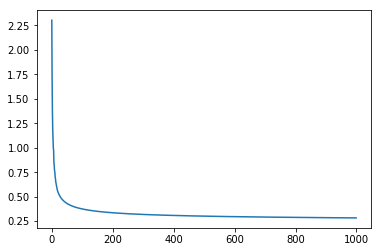

In [15]:
plt.plot(loss_vec)

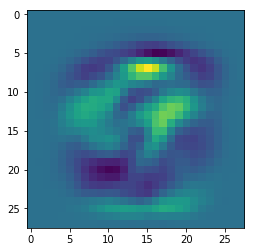

In [12]:
plt.imshow(scipy.reshape(w[:,9],[28,28]))

In [45]:
#We define a function to find the probability and prediction for each class of given input data
def probab_predict(input_data):
    prob = softmax_reg(np.dot(input_data,w))
    pred = np.argmax(prob,axis=1)
    return prob,pred

In [48]:
def getAccuracy(input_data,out_data):
    prob,pred = probab_predict(input_data)
    if pred.all() == out_data.all() :
        accuracy = sum(pred)/(float(len(out_data)))
        return accuracy

In [49]:
print ('Training Accuracy: ', getAccuracy(train_image,test_label))
print ('Test Accuracy: ', getAccuracy(test_image,test_label))

[[  5.37733546e-08   4.71799088e-09   2.20251510e-08 ...,   5.18193816e-05
    1.75205025e-06   2.83078853e-04]
 [  1.31190775e-07   9.78718797e-01   1.88276966e-04 ...,   1.24392364e-05
    7.89130310e-03   5.43421523e-04]
 [  2.11041238e-07   1.13752713e-02   1.17401208e-03 ...,   8.14919028e-03
    3.05611369e-01   1.60806569e-01]
 ..., 
 [  1.65636230e-05   3.16561408e-08   4.14657913e-09 ...,   5.22047145e-01
    4.82858885e-05   4.49022439e-01]
 [  4.73780618e-05   1.82644010e-02   1.27706918e-03 ...,   9.47107938e-01
    2.13487267e-03   2.45079184e-02]
 [  2.61829707e-07   1.36983052e-05   2.54330869e-04 ...,   2.01203258e-04
    9.64104378e-01   1.68918803e-04]]
Training Accuracy:  26.6723
[[  9.58681341e-06   9.69558856e-01   1.43429801e-02 ...,   2.19550299e-03
    9.79753156e-03   3.95662820e-04]
 [  9.85230235e-06   1.81923740e-09   7.26364904e-05 ...,   4.57335086e-03
    9.19308280e-03   9.56520326e-01]
 [  3.27487706e-08   3.99962234e-04   9.96438477e-01 ...,   8.000017

In [39]:
prob,pred = probab_predict(train_image)

[[  5.37733546e-08   4.71799088e-09   2.20251510e-08 ...,   5.18193816e-05
    1.75205025e-06   2.83078853e-04]
 [  1.31190775e-07   9.78718797e-01   1.88276966e-04 ...,   1.24392364e-05
    7.89130310e-03   5.43421523e-04]
 [  2.11041238e-07   1.13752713e-02   1.17401208e-03 ...,   8.14919028e-03
    3.05611369e-01   1.60806569e-01]
 ..., 
 [  1.65636230e-05   3.16561408e-08   4.14657913e-09 ...,   5.22047145e-01
    4.82858885e-05   4.49022439e-01]
 [  4.73780618e-05   1.82644010e-02   1.27706918e-03 ...,   9.47107938e-01
    2.13487267e-03   2.45079184e-02]
 [  2.61829707e-07   1.36983052e-05   2.54330869e-04 ...,   2.01203258e-04
    9.64104378e-01   1.68918803e-04]]


In [40]:
pred == train_label

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)